# TCNNF Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_tcnnf = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/tcnnf.csv')
df_tcnnf['Date'] = pd.to_datetime(df_tcnnf['Date'])
df_tcnnf = df_tcnnf.set_index('Date')
df_tcnnf = df_tcnnf.rename(columns={'Open':'tcnnf_Open', 'High':'tcnnf_High', 'Low':'tcnnf_Low', 'Close':'tcnnf_Close', 'Volume':'tcnnf_Volume'})
df_tcnnf = df_tcnnf.drop('Adj Close', axis=1)
df_tcnnf['tcnnf_prev_close'] = df_tcnnf['tcnnf_Close'].shift(1)
df_tcnnf['tcnnf_next_close'] = df_tcnnf['tcnnf_Close'].shift(-1)
df_tcnnf['tcnnf_diff'] = df_tcnnf['tcnnf_Close'].diff()
df_tcnnf['tcnnf_%change'] = df_tcnnf['tcnnf_Close'].pct_change()
df_tcnnf['tcnnf_5day_avg_close'] = df_tcnnf['tcnnf_Close'].rolling(5).mean()
df_tcnnf['tcnnf_5day_avg_diff'] = df_tcnnf['tcnnf_diff'].rolling(5).mean()
df_tcnnf['tcnnf_10day_avg_close'] = df_tcnnf['tcnnf_Close'].rolling(10).mean()
df_tcnnf['tcnnf_10day_avg_diff'] = df_tcnnf['tcnnf_diff'].rolling(10).mean()

In [4]:
df_tcnnf

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   
...                ...         ...        ...          ...           ...   
2022-05-17   14.480000   15.390000     14.240       14.505        200400   
2022-05-18   14.910000   15.180000     14.230       14.370        167400   
2022-05-19   14.360000   14.920000     14.020       14.750        115100   
2022-05-20   15.030000   15.400000     14.430       15.160        193500   
2022-05-23   14.500000   15.340000     14.500       15.000        107100   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27               NaN            11.675         NaN            NaN   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   
...                      ...               ...         ...            ...   
2022-05-17            14.480            14.370       0.025       0.001727   
2022-05-18            14.505            14.750      -0.135      -0.009307   
2022-05-19            14.370            15.160       0.380       0.026444   
2022-05-20            14.750            15.000       0.410       0.027797   
2022-05-23            15.160               NaN      -0.160      -0.010554   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                   NaN                  NaN                    NaN   
2018-09-28                   NaN                  NaN                    NaN   
2018-10-01                   NaN                  NaN                    NaN   
2018-10-02                   NaN                  NaN                    NaN   
2018-10-03               13.9746                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17               14.2510                0.095                14.1665   
2022-05-18               14.4050                0.154                14.2285   
2022-05-19               14.5750                0.170                14.3435   
2022-05-20               14.6530                0.078                14.3795   
2022-05-23               14.7570                0.104                14.4565   

            tcnnf_10day_avg_diff  
Date                              
2018-09-27                   NaN  
2018-09-28                   NaN  
2018-10-01                   NaN  
2018-10-02                   NaN  
2018-10-03                   NaN  
...                          ...  
2022-05-17                0.0765  
2022-05-18                0.0620  
2022-05-19                0.1150  
2022-05-20                0.0360  
2022-05-23                0.0770  

[920 rows x 13 columns]

In [5]:
cut = df_tcnnf.index.min()
cut

Timestamp('2018-09-27 00:00:00')

Text(0.5, 0, 'TCNNF Close')

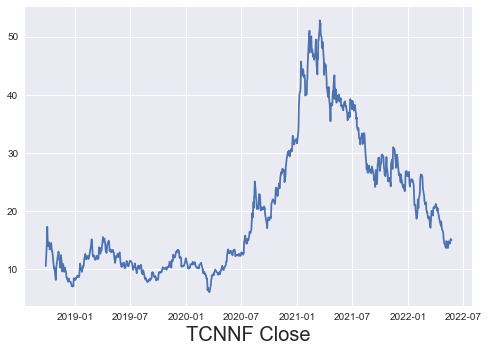

In [6]:
plt.plot(df_tcnnf['tcnnf_Close'])
plt.xlabel('TCNNF Close', fontsize=20)

## TCNNF and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-18   32468.67   32468.67  31393.95    31490.07  508465869.0   
2022-05-19   31262.62   31569.13  31016.41    31253.13  554268268.0   
2022-05-20   31426.94   31515.78  30635.76    31261.90  551025623.0   
2022-05-23   31395.89   31968.42  31395.89    31880.24  452693827.0   
2022-05-24   31717.61   32014.86  31365.59    31928.62  428081450.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-18         32654.59         31253.13   -1164.52     -0.035662   
2022-05-19         31490.07         31261.90    -236.94     -0.007524   
2022-05-20         31253.13         31880.24       8.77      0.000281   
2022-05-23         31261.90         31928.62     618.34      0.019779   
2022-05-24         31880.24              NaN      48.38      0.001518   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-18            32059.008             -68.808             32243.293   
2022-05-19            31963.574             -95.434             32068.809   
2022-05-20            31776.622            -186.952             31905.062   
2022-05-23            31707.986             -68.636             31868.516   
2022-05-24            31562.792            -145.194             31845.304   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-18             -257.099  
2022-05-19             -174.484  
2022-05-20             -163.747  
2022-05-23              -36.546  
2022-05-24              -23.212  

[32641 rows x 13 columns]

In [8]:
df0 = pd.merge(df_tcnnf, df_dow, on='Date', how='left')
df0

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   
...                ...         ...        ...          ...           ...   
2022-05-17   14.480000   15.390000     14.240       14.505        200400   
2022-05-18   14.910000   15.180000     14.230       14.370        167400   
2022-05-19   14.360000   14.920000     14.020       14.750        115100   
2022-05-20   15.030000   15.400000     14.430       15.160        193500   
2022-05-23   14.500000   15.340000     14.500       15.000        107100   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27               NaN            11.675         NaN            NaN   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   
...                      ...               ...         ...            ...   
2022-05-17            14.480            14.370       0.025       0.001727   
2022-05-18            14.505            14.750      -0.135      -0.009307   
2022-05-19            14.370            15.160       0.380       0.026444   
2022-05-20            14.750            15.000       0.410       0.027797   
2022-05-23            15.160               NaN      -0.160      -0.010554   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                   NaN                  NaN                    NaN   
2018-09-28                   NaN                  NaN                    NaN   
2018-10-01                   NaN                  NaN                    NaN   
2018-10-02                   NaN                  NaN                    NaN   
2018-10-03               13.9746                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17               14.2510                0.095                14.1665   
2022-05-18               14.4050                0.154                14.2285   
2022-05-19               14.5750                0.170                14.3435   
2022-05-20               14.6530                0.078                14.3795   
2022-05-23               14.7570                0.104                14.4565   

            tcnnf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-09-27                   NaN   26418.27   26557.01  26379.95    26439.93   
2018-09-28                   NaN   26407.66   26515.76  26383.57    26458.31   
2018-10-01                   NaN   26598.36   26737.98  26596.05    26651.21   
2018-10-02                   NaN   26648.91   26824.78  26627.66    26773.94   
2018-10-03                   NaN   26833.47   26951.81  26789.08    26828.39   
...                          ...        ...        ...       ...         ...   
2022-05-17                0.0765   32427.00   32689.14  32308.15    32654.59   
2022-05-18                0.0620   32468.67   32468.67  31393.95    31490.07   
2022-05-19                0.1150   31262.62   31569.13  31016.41    31253.13   
2022-05-20                0.0360   31426.94   31515.78  30635.76    31261.90   
2022-05-23          

In [9]:
df_isna0 = df0.isna()
df_isna0

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27       False       False      False        False         False   
2018-09-28       False       False      False        False         False   
2018-10-01       False       False      False        False         False   
2018-10-02       False       False      False        False         False   
2018-10-03       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27              True             False        True           True   
2018-09-28             False             False       False          False   
2018-10-01             False             False       False          False   
2018-10-02             False             False       False          False   
2018-10-03             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                  True                 True                   True   
2018-09-28                  True                 True                   True   
2018-10-01                  True                 True                   True   
2018-10-02                  True                 True                   True   
2018-10-03                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            tcnnf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-09-27                  True      False      False     False       False   
2018-09-28                  True      False      False     False       False   
2018-10-01                  True      False      False     False       False   
2018-10-02                  True      False      False     False       False   
2018-10-03                  True      False      False     False       False   
...                          ...        ...        ...       ...         ...   
2022-05-17                 False      False      False     False       False   
2022-05-18                 False      False      False     False       False   
2022-05-19                 False      False      False     False       False   
2022-05-20                 False      False      False     False       False   
2022-05-23          

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27             0.000            11.675       0.000       0.000000   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                0.0000                  0.0                    0.0   
2018-09-28                0.0000                  0.0                    0.0   
2018-10-01                0.0000                  0.0                    0.0   
2018-10-02                0.0000                  0.0                    0.0   
2018-10-03               13.9746                  0.0                    0.0   

            tcnnf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-09-27                   0.0   26418.27   26557.01  26379.95    26439.93   
2018-09-28                   0.0   26407.66   26515.76  26383.57    26458.31   
2018-10-01                   0.0   26598.36   26737.98  26596.05    26651.21   
2018-10-02                   0.0   26648.91   26824.78  26627.66    26773.94   
2018-10-03                   0.0   26833.47   26951.81  26789.08    26828.39   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2018-09-27  226281713.0         26385.28         26458.31      54.65   
2018-09-28  264039895.0         26439.93         26651.21      18.38   
2018-10-01  238346239.0         26458.31         26773.94     192.90   
2018-10-02  258331451.0         26651.21         26828.39     122.73   
2018-10-03  280155725.0         26773.94         26627.48      54.45   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2018-09-27      0.002071            26524.594             -43.410   
2018-09-28      0.000695            26467.556             -57.038   
2018-10-01      0.007291            26485.388              17.832   
2018-10-02      0.004605            26541.734              56.346   
2018-10-03      0.002034            26630.356              88.622   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2018-09-27             26414.946               29.394  
2018-09-28             26445.310               30.364  
2018-10-01             26504.219               58.909  
2018-10-02             26556.917               52.698  
2018-10-03             26599.180               42.263

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   
...                ...         ...        ...          ...           ...   
2022-05-17   14.480000   15.390000     14.240       14.505        200400   
2022-05-18   14.910000   15.180000     14.230       14.370        167400   
2022-05-19   14.360000   14.920000     14.020       14.750        115100   
2022-05-20   15.030000   15.400000     14.430       15.160        193500   
2022-05-23   14.500000   15.340000     14.500       15.000        107100   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27             0.000            11.675       0.000       0.000000   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   
...                      ...               ...         ...            ...   
2022-05-17            14.480            14.370       0.025       0.001727   
2022-05-18            14.505            14.750      -0.135      -0.009307   
2022-05-19            14.370            15.160       0.380       0.026444   
2022-05-20            14.750            15.000       0.410       0.027797   
2022-05-23            15.160             0.000      -0.160      -0.010554   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                0.0000                0.000                 0.0000   
2018-09-28                0.0000                0.000                 0.0000   
2018-10-01                0.0000                0.000                 0.0000   
2018-10-02                0.0000                0.000                 0.0000   
2018-10-03               13.9746                0.000                 0.0000   
...                          ...                  ...                    ...   
2022-05-17               14.2510                0.095                14.1665   
2022-05-18               14.4050                0.154                14.2285   
2022-05-19               14.5750                0.170                14.3435   
2022-05-20               14.6530                0.078                14.3795   
2022-05-23               14.7570                0.104                14.4565   

            tcnnf_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                           
2018-09-27                0.0000   26418.27   26557.01  26379.95    26439.93   
2018-09-28                0.0000   26407.66   26515.76  26383.57    26458.31   
2018-10-01                0.0000   26598.36   26737.98  26596.05    26651.21   
2018-10-02                0.0000   26648.91   26824.78  26627.66    26773.94   
2018-10-03                0.0000   26833.47   26951.81  26789.08    26828.39   
...                          ...        ...        ...       ...         ...   
2022-05-17                0.0765   32427.00   32689.14  32308.15    32654.59   
2022-05-18                0.0620   32468.67   32468.67  31393.95    31490.07   
2022-05-19                0.1150   31262.62   31569.13  31016.41    31253.13   
2022-05-20                0.0360   31426.94   31515.78  30635.76    31261.90   
2022-05-23          

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'tcnnf_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2018-09-27      9   27  2018        3    9.499000   12.000000      9.499   
2018-09-28      9   28  2018        3   12.000000   12.000000     11.065   
2018-10-01     10    1  2018        4   12.492000   14.847000     12.475   
2018-10-02     10    2  2018        4   15.381000   17.789000     15.326   
2018-10-03     10    3  2018        4   18.587999   18.589001     14.440   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_next_close  \
Date                                                                        
2018-09-27       10.507        170400             0.000            11.675   
2018-09-28       11.675        175100            10.507            14.847   
2018-10-01       14.847        324900            11.675            17.270   
2018-10-02       17.270        335600            14.847            15.574   
2018-10-03       15.574        346300            17.270            13.938   

            tcnnf_diff  tcnnf_%change  tcnnf_5day_avg_close  \
Date                                                          
2018-09-27       0.000       0.000000                0.0000   
2018-09-28       1.168       0.111164                0.0000   
2018-10-01       3.172       0.271692                0.0000   
2018-10-02       2.423       0.163198                0.0000   
2018-10-03      -1.696      -0.098205               13.9746   

            tcnnf_5day_avg_diff  tcnnf_10day_avg_close  tcnnf_10day_avg_diff  \
Date                                                                           
2018-09-27                  0.0                    0.0                   0.0   
2018-09-28                  0.0                    0.0                   0.0   
2018-10-01                  0.0                    0.0                   0.0   
2018-10-02                  0.0                    0.0                   0.0   
2018-10-03                  0.0                    0.0                   0.0   

            djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
2018-09-27   26418.27   26557.01  26379.95    26439.93  226281713.0   
2018-09-28   26407.66   26515.76  26383.57    26458.31  264039895.0   
2018-10-01   26598.36   26737.98  26596.05    26651.21  238346239.0   
2018-10-02   26648.91   26824.78  26627.66    26773.94  258331451.0   
2018-10-03   26833.47   26951.81  26789.08    26828.39  280155725.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
2018-09-27         26385.28         26458.31      54.65      0.002071   
2018-09-28         26439.93         26651.21      18.38      0.000695   
2018-10-01         26458.31         26773.94     192.90      0.007291   
2018-10-02         26651.21         26828.39     122.73      0.004605   
2018-10-03         26773.94         26627.48      54.45      0.002034   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
2018-09-27            26524.594             -43.410             26414.946   
2018-09-28            26467.556             -57.038             26445.310   
2018-10-01            26485.388              17.832             26504.219   
2018-10-02            26541.734              56.346             26556.917   
2018-10-03            26630.356              88.622             26599.180   

            djix_10day_avg_diff  tcnnf_Open_b  tcnnf_High_b  tcnnf_Low_b  \
Date                                                                       
2018-09-27               29.394         False         False        False   
2018-09-28               30.364         False         False        False   
2018-10-01               58.909         False         False        False   
2018-1

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(919, 56)

In [18]:
n = int(len(df0) * 0.9)
n

827

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

827
92


In [21]:
X_train0 = train0.drop('tcnnf_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2018-09-27      9   27  2018        3       9.499      12.000      9.499   
2018-09-28      9   28  2018        3      12.000      12.000     11.065   
2018-10-01     10    1  2018        4      12.492      14.847     12.475   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_diff  \
Date                                                                  
2018-09-27       10.507        170400             0.000       0.000   
2018-09-28       11.675        175100            10.507       1.168   
2018-10-01       14.847        324900            11.675       3.172   

            tcnnf_%change  tcnnf_5day_avg_close  tcnnf_5day_avg_diff  \
Date                                                                   
2018-09-27       0.000000                   0.0                  0.0   
2018-09-28       0.111164                   0.0                  0.0   
2018-10-01       0.271692                   0.0                  0.0   

            tcnnf_10day_avg_close  tcnnf_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2018-09-27                    0.0                   0.0   26418.27   26557.01   
2018-09-28                    0.0                   0.0   26407.66   26515.76   
2018-10-01                    0.0                   0.0   26598.36   26737.98   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2018-09-27  26379.95    26439.93  226281713.0         26385.28   
2018-09-28  26383.57    26458.31  264039895.0         26439.93   
2018-10-01  26596.05    26651.21  238346239.0         26458.31   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2018-09-27         26458.31      54.65      0.002071            26524.594   
2018-09-28         26651.21      18.38      0.000695            26467.556   
2018-10-01         26773.94     192.90      0.007291            26485.388   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2018-09-27             -43.410             26414.946               29.394   
2018-09-28             -57.038             26445.310               30.364   
2018-10-01              17.832             26504.219               58.909   

            tcnnf_Open_b  tcnnf_High_b  tcnnf_Low_b  tcnnf_Close_b  \
Date                                                                 
2018-09-27         False         False        False          False   
2018-09-28         False         False        False          False   
2018-10-01         False         False        False          False   

            tcnnf_Volume_b  tcnnf_prev_close_b  tcnnf_next_close_b  \
Date                                                                 
2018-09-27           False                True               False   
2018-09-28           False               False               False   
2018-10-01           False               False               False   

            tcnnf_diff_b  tcnnf_%change_b  tcnnf_5day_avg_close_b  \
Date                                                                
2018-09-27          True             True                    True   
2018-09-28         False            False                    True   
2018-10-01         False            False                    True   

            tcnnf_5day_avg_diff_b  tcnnf_10day_avg_close_b  \
Date                                                         
2018-09-27                   True                     True   
2018-09-28                   True                     True   
2018-10-01                   True                     True   

            tcnnf_10day_avg_diff_b  djix_Open_

In [22]:
X_train0.shape

(827, 55)

In [23]:
y_train0 = train0['tcnnf_next_close']
y_train0.head(3)

Date
2018-09-27    11.675
2018-09-28    14.847
2018-10-01    17.270
Name: tcnnf_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2022-01-05    24.150000
2022-01-06    25.290001
2022-01-07    25.320000
Name: tcnnf_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('tcnnf_next_close', axis=1)
y_test0 = test0['tcnnf_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2022-01-10      1   10  2022        1      25.500   25.790001  24.820000   
2022-01-11      1   11  2022        1      25.500   26.500000  24.940001   
2022-01-12      1   12  2022        1      25.421   25.860001  25.000000   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_diff  \
Date                                                                  
2022-01-10    25.320000        332200         25.290001    0.029999   
2022-01-11    25.268000        268600         25.320000   -0.052000   
2022-01-12    25.440001        180100         25.268000    0.172001   

            tcnnf_%change  tcnnf_5day_avg_close  tcnnf_5day_avg_diff  \
Date                                                                   
2022-01-10       0.001186               24.9300              -0.2780   
2022-01-11      -0.002054               24.9016              -0.0284   
2022-01-12       0.006807               25.0936               0.1920   

            tcnnf_10day_avg_close  tcnnf_10day_avg_diff  djix_Open  djix_High  \
Date                                                                            
2022-01-10                25.6085               -0.1480   36175.21   36175.21   
2022-01-11                25.5368               -0.0717   36058.85   36271.47   
2022-01-12                25.4288               -0.1080   36336.16   36453.49   

            djix_Low  djix_Close  djix_Volume  djix_prev_close  \
Date                                                             
2022-01-10  35639.91    36068.87  488023456.0         36231.66   
2022-01-11  35769.38    36252.02  421210623.0         36068.87   
2022-01-12  36168.15    36290.32  361798146.0         36252.02   

            djix_next_close  djix_diff  djix_%change  djix_5day_avg_close  \
Date                                                                        
2022-01-10         36252.02    -162.79     -0.004493            36348.752   
2022-01-11         36290.32     183.15      0.005078            36239.226   
2022-01-12         36113.62      38.30      0.001056            36215.868   

            djix_5day_avg_diff  djix_10day_avg_close  djix_10day_avg_diff  \
Date                                                                        
2022-01-10            -103.238             36395.204              -23.351   
2022-01-11            -109.526             36380.585              -14.619   
2022-01-12             -23.358             36360.754              -19.831   

            tcnnf_Open_b  tcnnf_High_b  tcnnf_Low_b  tcnnf_Close_b  \
Date                                                                 
2022-01-10         False         False        False          False   
2022-01-11         False         False        False          False   
2022-01-12         False         False        False          False   

            tcnnf_Volume_b  tcnnf_prev_close_b  tcnnf_next_close_b  \
Date                                                                 
2022-01-10           False               False               False   
2022-01-11           False               False               False   
2022-01-12           False               False               False   

            tcnnf_diff_b  tcnnf_%change_b  tcnnf_5day_avg_close_b  \
Date                                                                
2022-01-10         False            False                   False   
2022-01-11         False            False                   False   
2022-01-12         False            False                   False   

            tcnnf_5day_avg_diff_b  tcnnf_10day_avg_close_b  \
Date                                                         
2022-01-10                  False                    False   
2022-01-11                  False                    False   
2022-01-12                  False                    False   

            tcnnf_10day_avg_diff_b  djix_Open_

In [27]:
X_test0.shape

(92, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-18    14.75
2022-05-19    15.16
2022-05-20    15.00
Name: tcnnf_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([25.12319798, 25.26746707, 25.38565147, 24.99100535, 25.00432696])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

0.655602909667744


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.5290449142842218


In [34]:
y_train0 = pd.DataFrame(y_train0, columns=['tcnnf_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['tcnnf_next_close'])

In [35]:
y_test0['tcnnf_pred_next_close'] = y_pred0

In [36]:
y_test0.tail()

tcnnf_next_close  tcnnf_pred_next_close
Date                                               
2022-05-16            14.505              14.718187
2022-05-17            14.370              14.089365
2022-05-18            14.750              14.270875
2022-05-19            15.160              14.994491
2022-05-20            15.000              15.577283

In [37]:
hyper_table.append(dict(stock='tcnnf', 
                        version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        actual_price=y_test0['tcnnf_next_close'][-1],
                        predicted_price=y_test0['tcnnf_pred_next_close'][-1],
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

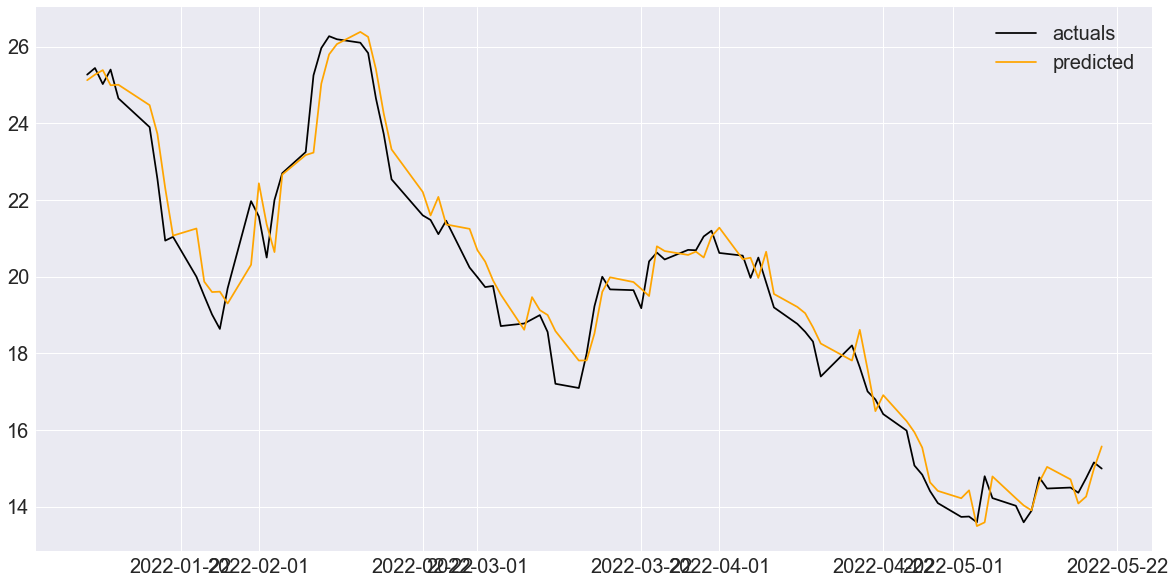

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['tcnnf_next_close'], color='black')
ax.plot(y_test0['tcnnf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## TCNNF and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_tcnnf, df_etfs, on='Date', how='left')
df1

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   
...                ...         ...        ...          ...           ...   
2022-05-17   14.480000   15.390000     14.240       14.505        200400   
2022-05-18   14.910000   15.180000     14.230       14.370        167400   
2022-05-19   14.360000   14.920000     14.020       14.750        115100   
2022-05-20   15.030000   15.400000     14.430       15.160        193500   
2022-05-23   14.500000   15.340000     14.500       15.000        107100   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27               NaN            11.675         NaN            NaN   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   
...                      ...               ...         ...            ...   
2022-05-17            14.480            14.370       0.025       0.001727   
2022-05-18            14.505            14.750      -0.135      -0.009307   
2022-05-19            14.370            15.160       0.380       0.026444   
2022-05-20            14.750            15.000       0.410       0.027797   
2022-05-23            15.160               NaN      -0.160      -0.010554   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                   NaN                  NaN                    NaN   
2018-09-28                   NaN                  NaN                    NaN   
2018-10-01                   NaN                  NaN                    NaN   
2018-10-02                   NaN                  NaN                    NaN   
2018-10-03               13.9746                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17               14.2510                0.095                14.1665   
2022-05-18               14.4050                0.154                14.2285   
2022-05-19               14.5750                0.170                14.3435   
2022-05-20               14.6530                0.078                14.3795   
2022-05-23               14.7570                0.104                14.4565   

            tcnnf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-09-27                   NaN  39.000000  39.240002  38.209999  38.720001   
2018-09-28                   NaN  38.869999  40.150002  38.650002  40.049999   
2018-10-01                   NaN  41.230000  41.480000  40.230000  40.700001   
2018-10-02                   NaN  40.419998  40.520000  38.459999  38.660000   
2018-10-03                   NaN  39.299999  40.160000  38.500000  40.040001   
...                          ...        ...        ...        ...        ...   
2022-05-17                0.0765   7.990000   8.170000   7.880000   8.100000   
2022-05-18                0.0620   7.940000   8.030000   7.605000   7.620000   
2022-05-19                0.1150   7.560000   7.860000   7.540000   7.780000   
2022-05-20                0.0360   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [41]:
df_isna1 = df1.isna()
df_isna1

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27       False       False      False        False         False   
2018-09-28       False       False      False        False         False   
2018-10-01       False       False      False        False         False   
2018-10-02       False       False      False        False         False   
2018-10-03       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27              True             False        True           True   
2018-09-28             False             False       False          False   
2018-10-01             False             False       False          False   
2018-10-02             False             False       False          False   
2018-10-03             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                  True                 True                   True   
2018-09-28                  True                 True                   True   
2018-10-01                  True                 True                   True   
2018-10-02                  True                 True                   True   
2018-10-03                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            tcnnf_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2018-09-27                  True    False    False   False     False   
2018-09-28                  True    False    False   False     False   
2018-10-01                  True    False    False   False     False   
2018-10-02                  True    False    False   False     False   
2018-10-03                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-17                 False    False    False   False     False   
2022-05-18                 False    False    False   False     False   
2022-05-19                 False    False    False   False     False   
2022-05-20                 False    False    False   False     False   
2022-05-23                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27             0.000            11.675       0.000       0.000000   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                0.0000                  0.0                    0.0   
2018-09-28                0.0000                  0.0                    0.0   
2018-10-01                0.0000                  0.0                    0.0   
2018-10-02                0.0000                  0.0                    0.0   
2018-10-03               13.9746                  0.0                    0.0   

            tcnnf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-09-27                   0.0  39.000000  39.240002  38.209999  38.720001   
2018-09-28                   0.0  38.869999  40.150002  38.650002  40.049999   
2018-10-01                   0.0  41.230000  41.480000  40.230000  40.700001   
2018-10-02                   0.0  40.419998  40.520000  38.459999  38.660000   
2018-10-03                   0.0  39.299999  40.160000  38.500000  40.040001   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-09-27     979100      38.939999      40.049999 -0.219998   -0.005650   
2018-09-28     653600      38.720001      40.700001  1.329998    0.034349   
2018-10-01    1024100      40.049999      38.660000  0.650002    0.016230   
2018-10-02     899800      40.700001      40.040001 -2.040001   -0.050123   
2018-10-03     706700      38.660000      39.090000  1.380001    0.035696   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-09-27             39.158         -0.857999              39.261   
2018-09-28             39.268          0.110000              39.689   
2018-10-01             39.554          0.286000              40.044   
2018-10-02             39.414         -0.140000              39.942   
2018-10-03             39.634          0.220000              39.825   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-09-27              0.339        0.0        0.0       0.0         0.0   
2018-09-28              0.428        0.0        0.0       0.0         0.0   
2018-10-01              0.355        0.0        0.0       0.0         0.0   
2018-10-02             -0.102        0.0        0.0       0.0         0.0   
2018-10-03             -0.117        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-09-27          0.0              0.0              0.0        0.0   
2018-09-28          0.0

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   
...                ...         ...        ...          ...           ...   
2022-05-17   14.480000   15.390000     14.240       14.505        200400   
2022-05-18   14.910000   15.180000     14.230       14.370        167400   
2022-05-19   14.360000   14.920000     14.020       14.750        115100   
2022-05-20   15.030000   15.400000     14.430       15.160        193500   
2022-05-23   14.500000   15.340000     14.500       15.000        107100   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27             0.000            11.675       0.000       0.000000   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   
...                      ...               ...         ...            ...   
2022-05-17            14.480            14.370       0.025       0.001727   
2022-05-18            14.505            14.750      -0.135      -0.009307   
2022-05-19            14.370            15.160       0.380       0.026444   
2022-05-20            14.750            15.000       0.410       0.027797   
2022-05-23            15.160             0.000      -0.160      -0.010554   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                0.0000                0.000                 0.0000   
2018-09-28                0.0000                0.000                 0.0000   
2018-10-01                0.0000                0.000                 0.0000   
2018-10-02                0.0000                0.000                 0.0000   
2018-10-03               13.9746                0.000                 0.0000   
...                          ...                  ...                    ...   
2022-05-17               14.2510                0.095                14.1665   
2022-05-18               14.4050                0.154                14.2285   
2022-05-19               14.5750                0.170                14.3435   
2022-05-20               14.6530                0.078                14.3795   
2022-05-23               14.7570                0.104                14.4565   

            tcnnf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-09-27                0.0000  39.000000  39.240002  38.209999  38.720001   
2018-09-28                0.0000  38.869999  40.150002  38.650002  40.049999   
2018-10-01                0.0000  41.230000  41.480000  40.230000  40.700001   
2018-10-02                0.0000  40.419998  40.520000  38.459999  38.660000   
2018-10-03                0.0000  39.299999  40.160000  38.500000  40.040001   
...                          ...        ...        ...        ...        ...   
2022-05-17                0.0765   7.990000   8.170000   7.880000   8.100000   
2022-05-18                0.0620   7.940000   8.030000   7.605000   7.620000   
2022-05-19                0.1150   7.560000   7.860000   7.540000   7.780000   
2022-05-20                0.0360   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'tcnnf_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2018-09-27      9   27  2018        3    9.499000   12.000000      9.499   
2018-09-28      9   28  2018        3   12.000000   12.000000     11.065   
2018-10-01     10    1  2018        4   12.492000   14.847000     12.475   
2018-10-02     10    2  2018        4   15.381000   17.789000     15.326   
2018-10-03     10    3  2018        4   18.587999   18.589001     14.440   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-17      5   17  2022        2   14.480000   15.390000     14.240   
2022-05-18      5   18  2022        2   14.910000   15.180000     14.230   
2022-05-19      5   19  2022        2   14.360000   14.920000     14.020   
2022-05-20      5   20  2022        2   15.030000   15.400000     14.430   
2022-05-23      5   23  2022        2   14.500000   15.340000     14.500   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_next_close  \
Date                                                                        
2018-09-27       10.507        170400             0.000            11.675   
2018-09-28       11.675        175100            10.507            14.847   
2018-10-01       14.847        324900            11.675            17.270   
2018-10-02       17.270        335600            14.847            15.574   
2018-10-03       15.574        346300            17.270            13.938   
...                 ...           ...               ...               ...   
2022-05-17       14.505        200400            14.480            14.370   
2022-05-18       14.370        167400            14.505            14.750   
2022-05-19       14.750        115100            14.370            15.160   
2022-05-20       15.160        193500            14.750            15.000   
2022-05-23       15.000        107100            15.160             0.000   

            tcnnf_diff  tcnnf_%change  tcnnf_5day_avg_close  \
Date                                                          
2018-09-27       0.000       0.000000                0.0000   
2018-09-28       1.168       0.111164                0.0000   
2018-10-01       3.172       0.271692                0.0000   
2018-10-02       2.423       0.163198                0.0000   
2018-10-03      -1.696      -0.098205               13.9746   
...                ...            ...                   ...   
2022-05-17       0.025       0.001727               14.2510   
2022-05-18      -0.135      -0.009307               14.4050   
2022-05-19       0.380       0.026444               14.5750   
2022-05-20       0.410       0.027797               14.6530   
2022-05-23      -0.160      -0.010554               14.7570   

            tcnnf_5day_avg_diff  tcnnf_10day_avg_close  tcnnf_10day_avg_diff  \
Date                                                                           
2018-09-27                0.000                 0.0000                0.0000   
2018-09-28                0.000                 0.0000                0.0000   
2018-10-01                0.000                 0.0000                0.0000   
2018-10-02                0.000                 0.0000                0.0000   
2018-10-03                0.000                 0.0000                0.0000   
...                         ...                    ...                   ...   
2022-05-17                0.095                14.1665                0.0765   
2022-05-18                0.154                14.2285                0.0620   
2022-05-19                0.170                14.3435                0.1150   
2022-05-20                0.078                14.3795                0.0360   
2022-05-23                0.104                14.4565                0.0770   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2018-09-27  39.000000 

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

827

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

827
92


In [52]:
X_train1 = train1.drop('tcnnf_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2018-09-27      9   27  2018        3       9.499      12.000      9.499   
2018-09-28      9   28  2018        3      12.000      12.000     11.065   
2018-10-01     10    1  2018        4      12.492      14.847     12.475   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_diff  \
Date                                                                  
2018-09-27       10.507        170400             0.000       0.000   
2018-09-28       11.675        175100            10.507       1.168   
2018-10-01       14.847        324900            11.675       3.172   

            tcnnf_%change  tcnnf_5day_avg_close  tcnnf_5day_avg_diff  \
Date                                                                   
2018-09-27       0.000000                   0.0                  0.0   
2018-09-28       0.111164                   0.0                  0.0   
2018-10-01       0.271692                   0.0                  0.0   

            tcnnf_10day_avg_close  tcnnf_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2018-09-27                    0.0                   0.0  39.000000  39.240002   
2018-09-28                    0.0                   0.0  38.869999  40.150002   
2018-10-01                    0.0                   0.0  41.230000  41.480000   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2018-09-27  38.209999  38.720001     979100      38.939999      40.049999   
2018-09-28  38.650002  40.049999     653600      38.720001      40.700001   
2018-10-01  40.230000  40.700001    1024100      40.049999      38.660000   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2018-09-27 -0.219998   -0.005650             39.158         -0.857999   
2018-09-28  1.329998    0.034349             39.268          0.110000   
2018-10-01  0.650002    0.016230             39.554          0.286000   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2018-09-27              39.261              0.339        0.0        0.0   
2018-09-28              39.689              0.428        0.0        0.0   
2018-10-01              40.044              0.355        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2018-09-27       0.0         0.0          0.0              0.0   
2018-09-28       0.0         0.0          0.0              0.0   
2018-10-01       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2018-09-27              0.0        0.0           0.0                  0.0   
2018-09-28              0.0        0.0           0.0                  0.0   
2018-10-01              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2018-09-27                 0.0                   0.0                  0.0   
2018-09-28                 0.0                   0.0                  0.0   
2018-10-01                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2018-09-27        0.0        0.0       0.0         0.0          0.0   
2018-09-28        0.0        0.0       0.0         0.0          

In [53]:
X_train1.shape

(827, 159)

In [54]:
y_train1 = train1['tcnnf_next_close']
y_train1.head(3)

Date
2018-09-27    11.675
2018-09-28    14.847
2018-10-01    17.270
Name: tcnnf_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2022-01-05    24.150000
2022-01-06    25.290001
2022-01-07    25.320000
Name: tcnnf_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('tcnnf_next_close', axis=1)
y_test1 = test1['tcnnf_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2022-01-10      1   10  2022        1      25.500   25.790001  24.820000   
2022-01-11      1   11  2022        1      25.500   26.500000  24.940001   
2022-01-12      1   12  2022        1      25.421   25.860001  25.000000   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_diff  \
Date                                                                  
2022-01-10    25.320000        332200         25.290001    0.029999   
2022-01-11    25.268000        268600         25.320000   -0.052000   
2022-01-12    25.440001        180100         25.268000    0.172001   

            tcnnf_%change  tcnnf_5day_avg_close  tcnnf_5day_avg_diff  \
Date                                                                   
2022-01-10       0.001186               24.9300              -0.2780   
2022-01-11      -0.002054               24.9016              -0.0284   
2022-01-12       0.006807               25.0936               0.1920   

            tcnnf_10day_avg_close  tcnnf_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2022-01-10                25.6085               -0.1480    11.06    11.16   
2022-01-11                25.5368               -0.0717    11.07    11.39   
2022-01-12                25.4288               -0.1080    11.35    11.47   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2022-01-10   10.86     11.07    1427900          10.87          11.31   
2022-01-11   10.97     11.31     966300          11.07          11.16   
2022-01-12   11.09     11.16     894000          11.31          10.85   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2022-01-10     0.20    0.018399             10.936            -0.072   
2022-01-11     0.24    0.021680             10.940             0.004   
2022-01-12    -0.15   -0.013263             11.018             0.078   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2022-01-10              11.073             -0.054  24.450001  24.500000   
2022-01-11              11.076              0.003  24.389999  24.879999   
2022-01-12              11.087              0.011  24.879999  25.228001   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2022-01-10  23.840000   24.430000     729700.0        24.450001   
2022-01-11  24.120001   24.700001     597400.0        24.430000   
2022-01-12  24.280001   24.790001    1086600.0        24.700001   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2022-01-10        24.700001  -0.020001     -0.000818               24.186   
2022-01-11        24.790001   0.270001      0.011052               24.170   
2022-01-12        24.559999   0.090000      0.003644               24.450   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2022-01-10              -0.272                24.752               -0.086   
2022-01-11              -0.016                24.752                0.000   
2022-01-12               0.280                24.727               -0.025   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2022-01-10      12.20     12.220     11.94       12.10      57100.0   
2022-01-11      12.00     12.393     12.00       12.37      69100.0   
2022-01-12      12.29     12.604 

In [58]:
X_test1.shape

(92, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-18    14.75
2022-05-19    15.16
2022-05-20    15.00
Name: tcnnf_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([25.33295636, 25.07132117, 24.98176952, 24.78943299, 24.97044833])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

0.3863398417790146


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

0.3056016022200589


In [64]:
y_train1 = pd.DataFrame(y_train1, columns=['tcnnf_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['tcnnf_next_close'])

In [65]:
y_test1['tcnnf_pred_next_close'] = y_pred1

In [66]:
y_test1.tail()

tcnnf_next_close  tcnnf_pred_next_close
Date                                               
2022-05-16            14.505              14.027156
2022-05-17            14.370              13.743235
2022-05-18            14.750              14.435367
2022-05-19            15.160              15.097043
2022-05-20            15.000              14.620530

In [67]:
hyper_table.append(dict(stock='tcnnf', 
                        version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        actual_price=y_test1['tcnnf_next_close'][-1],
                        predicted_price=y_test1['tcnnf_pred_next_close'][-1],
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

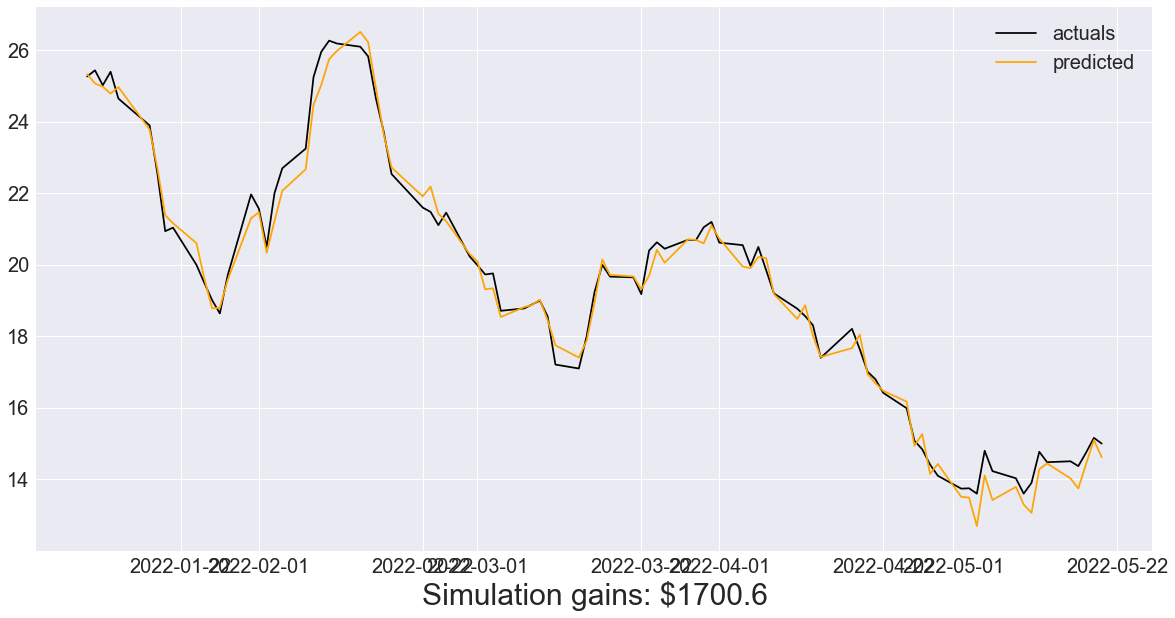

In [230]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['tcnnf_next_close'], color='black')
ax.plot(y_test1['tcnnf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.xlabel('Simulation gains: $' + str(round(total_gains, 2)), fontsize=30)
plt.show()

## TCNNF, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_tcnnf, df_etfs_dow, on='Date', how='left')
df2

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   
...                ...         ...        ...          ...           ...   
2022-05-17   14.480000   15.390000     14.240       14.505        200400   
2022-05-18   14.910000   15.180000     14.230       14.370        167400   
2022-05-19   14.360000   14.920000     14.020       14.750        115100   
2022-05-20   15.030000   15.400000     14.430       15.160        193500   
2022-05-23   14.500000   15.340000     14.500       15.000        107100   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27               NaN            11.675         NaN            NaN   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   
...                      ...               ...         ...            ...   
2022-05-17            14.480            14.370       0.025       0.001727   
2022-05-18            14.505            14.750      -0.135      -0.009307   
2022-05-19            14.370            15.160       0.380       0.026444   
2022-05-20            14.750            15.000       0.410       0.027797   
2022-05-23            15.160               NaN      -0.160      -0.010554   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                   NaN                  NaN                    NaN   
2018-09-28                   NaN                  NaN                    NaN   
2018-10-01                   NaN                  NaN                    NaN   
2018-10-02                   NaN                  NaN                    NaN   
2018-10-03               13.9746                  NaN                    NaN   
...                          ...                  ...                    ...   
2022-05-17               14.2510                0.095                14.1665   
2022-05-18               14.4050                0.154                14.2285   
2022-05-19               14.5750                0.170                14.3435   
2022-05-20               14.6530                0.078                14.3795   
2022-05-23               14.7570                0.104                14.4565   

            tcnnf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-09-27                   NaN  39.000000  39.240002  38.209999  38.720001   
2018-09-28                   NaN  38.869999  40.150002  38.650002  40.049999   
2018-10-01                   NaN  41.230000  41.480000  40.230000  40.700001   
2018-10-02                   NaN  40.419998  40.520000  38.459999  38.660000   
2018-10-03                   NaN  39.299999  40.160000  38.500000  40.040001   
...                          ...        ...        ...        ...        ...   
2022-05-17                0.0765   7.990000   8.170000   7.880000   8.100000   
2022-05-18                0.0620   7.940000   8.030000   7.605000   7.620000   
2022-05-19                0.1150   7.560000   7.860000   7.540000   7.780000   
2022-05-20                0.0360   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [71]:
df_isna2 = df2.isna()
df_isna2

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27       False       False      False        False         False   
2018-09-28       False       False      False        False         False   
2018-10-01       False       False      False        False         False   
2018-10-02       False       False      False        False         False   
2018-10-03       False       False      False        False         False   
...                ...         ...        ...          ...           ...   
2022-05-17       False       False      False        False         False   
2022-05-18       False       False      False        False         False   
2022-05-19       False       False      False        False         False   
2022-05-20       False       False      False        False         False   
2022-05-23       False       False      False        False         False   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27              True             False        True           True   
2018-09-28             False             False       False          False   
2018-10-01             False             False       False          False   
2018-10-02             False             False       False          False   
2018-10-03             False             False       False          False   
...                      ...               ...         ...            ...   
2022-05-17             False             False       False          False   
2022-05-18             False             False       False          False   
2022-05-19             False             False       False          False   
2022-05-20             False             False       False          False   
2022-05-23             False              True       False          False   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                  True                 True                   True   
2018-09-28                  True                 True                   True   
2018-10-01                  True                 True                   True   
2018-10-02                  True                 True                   True   
2018-10-03                 False                 True                   True   
...                          ...                  ...                    ...   
2022-05-17                 False                False                  False   
2022-05-18                 False                False                  False   
2022-05-19                 False                False                  False   
2022-05-20                 False                False                  False   
2022-05-23                 False                False                  False   

            tcnnf_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  \
Date                                                                   
2018-09-27                  True    False    False   False     False   
2018-09-28                  True    False    False   False     False   
2018-10-01                  True    False    False   False     False   
2018-10-02                  True    False    False   False     False   
2018-10-03                  True    False    False   False     False   
...                          ...      ...      ...     ...       ...   
2022-05-17                 False    False    False   False     False   
2022-05-18                 False    False    False   False     False   
2022-05-19                 False    False    False   False     False   
2022-05-20                 False    False    False   False     False   
2022-05-23                 False    False    False   False     False   

            mj_Volume  mj_prev_close  mj_ne

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27             0.000            11.675       0.000       0.000000   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                0.0000                  0.0                    0.0   
2018-09-28                0.0000                  0.0                    0.0   
2018-10-01                0.0000                  0.0                    0.0   
2018-10-02                0.0000                  0.0                    0.0   
2018-10-03               13.9746                  0.0                    0.0   

            tcnnf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-09-27                   0.0  39.000000  39.240002  38.209999  38.720001   
2018-09-28                   0.0  38.869999  40.150002  38.650002  40.049999   
2018-10-01                   0.0  41.230000  41.480000  40.230000  40.700001   
2018-10-02                   0.0  40.419998  40.520000  38.459999  38.660000   
2018-10-03                   0.0  39.299999  40.160000  38.500000  40.040001   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2018-09-27     979100      38.939999      40.049999 -0.219998   -0.005650   
2018-09-28     653600      38.720001      40.700001  1.329998    0.034349   
2018-10-01    1024100      40.049999      38.660000  0.650002    0.016230   
2018-10-02     899800      40.700001      40.040001 -2.040001   -0.050123   
2018-10-03     706700      38.660000      39.090000  1.380001    0.035696   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2018-09-27             39.158         -0.857999              39.261   
2018-09-28             39.268          0.110000              39.689   
2018-10-01             39.554          0.286000              40.044   
2018-10-02             39.414         -0.140000              39.942   
2018-10-03             39.634          0.220000              39.825   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2018-09-27              0.339        0.0        0.0       0.0         0.0   
2018-09-28              0.428        0.0        0.0       0.0         0.0   
2018-10-01              0.355        0.0        0.0       0.0         0.0   
2018-10-02             -0.102        0.0        0.0       0.0         0.0   
2018-10-03             -0.117        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2018-09-27          0.0              0.0              0.0        0.0   
2018-09-28          0.0

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

tcnnf_Open  tcnnf_High  tcnnf_Low  tcnnf_Close  tcnnf_Volume  \
Date                                                                       
2018-09-27    9.499000   12.000000      9.499       10.507        170400   
2018-09-28   12.000000   12.000000     11.065       11.675        175100   
2018-10-01   12.492000   14.847000     12.475       14.847        324900   
2018-10-02   15.381000   17.789000     15.326       17.270        335600   
2018-10-03   18.587999   18.589001     14.440       15.574        346300   
...                ...         ...        ...          ...           ...   
2022-05-17   14.480000   15.390000     14.240       14.505        200400   
2022-05-18   14.910000   15.180000     14.230       14.370        167400   
2022-05-19   14.360000   14.920000     14.020       14.750        115100   
2022-05-20   15.030000   15.400000     14.430       15.160        193500   
2022-05-23   14.500000   15.340000     14.500       15.000        107100   

            tcnnf_prev_close  tcnnf_next_close  tcnnf_diff  tcnnf_%change  \
Date                                                                        
2018-09-27             0.000            11.675       0.000       0.000000   
2018-09-28            10.507            14.847       1.168       0.111164   
2018-10-01            11.675            17.270       3.172       0.271692   
2018-10-02            14.847            15.574       2.423       0.163198   
2018-10-03            17.270            13.938      -1.696      -0.098205   
...                      ...               ...         ...            ...   
2022-05-17            14.480            14.370       0.025       0.001727   
2022-05-18            14.505            14.750      -0.135      -0.009307   
2022-05-19            14.370            15.160       0.380       0.026444   
2022-05-20            14.750            15.000       0.410       0.027797   
2022-05-23            15.160             0.000      -0.160      -0.010554   

            tcnnf_5day_avg_close  tcnnf_5day_avg_diff  tcnnf_10day_avg_close  \
Date                                                                           
2018-09-27                0.0000                0.000                 0.0000   
2018-09-28                0.0000                0.000                 0.0000   
2018-10-01                0.0000                0.000                 0.0000   
2018-10-02                0.0000                0.000                 0.0000   
2018-10-03               13.9746                0.000                 0.0000   
...                          ...                  ...                    ...   
2022-05-17               14.2510                0.095                14.1665   
2022-05-18               14.4050                0.154                14.2285   
2022-05-19               14.5750                0.170                14.3435   
2022-05-20               14.6530                0.078                14.3795   
2022-05-23               14.7570                0.104                14.4565   

            tcnnf_10day_avg_diff    mj_Open    mj_High     mj_Low   mj_Close  \
Date                                                                           
2018-09-27                0.0000  39.000000  39.240002  38.209999  38.720001   
2018-09-28                0.0000  38.869999  40.150002  38.650002  40.049999   
2018-10-01                0.0000  41.230000  41.480000  40.230000  40.700001   
2018-10-02                0.0000  40.419998  40.520000  38.459999  38.660000   
2018-10-03                0.0000  39.299999  40.160000  38.500000  40.040001   
...                          ...        ...        ...        ...        ...   
2022-05-17                0.0765   7.990000   8.170000   7.880000   8.100000   
2022-05-18                0.0620   7.940000   8.030000   7.605000   7.620000   
2022-05-19                0.1150   7.560000   7.860000   7.540000   7.780000   
2022-05-20                0.0360   7.860000   7.860000   7.420000   7.600000   
2022-05-23          

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'tcnnf_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2018-09-27      9   27  2018        3    9.499000   12.000000      9.499   
2018-09-28      9   28  2018        3   12.000000   12.000000     11.065   
2018-10-01     10    1  2018        4   12.492000   14.847000     12.475   
2018-10-02     10    2  2018        4   15.381000   17.789000     15.326   
2018-10-03     10    3  2018        4   18.587999   18.589001     14.440   
...           ...  ...   ...      ...         ...         ...        ...   
2022-05-17      5   17  2022        2   14.480000   15.390000     14.240   
2022-05-18      5   18  2022        2   14.910000   15.180000     14.230   
2022-05-19      5   19  2022        2   14.360000   14.920000     14.020   
2022-05-20      5   20  2022        2   15.030000   15.400000     14.430   
2022-05-23      5   23  2022        2   14.500000   15.340000     14.500   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_next_close  \
Date                                                                        
2018-09-27       10.507        170400             0.000            11.675   
2018-09-28       11.675        175100            10.507            14.847   
2018-10-01       14.847        324900            11.675            17.270   
2018-10-02       17.270        335600            14.847            15.574   
2018-10-03       15.574        346300            17.270            13.938   
...                 ...           ...               ...               ...   
2022-05-17       14.505        200400            14.480            14.370   
2022-05-18       14.370        167400            14.505            14.750   
2022-05-19       14.750        115100            14.370            15.160   
2022-05-20       15.160        193500            14.750            15.000   
2022-05-23       15.000        107100            15.160             0.000   

            tcnnf_diff  tcnnf_%change  tcnnf_5day_avg_close  \
Date                                                          
2018-09-27       0.000       0.000000                0.0000   
2018-09-28       1.168       0.111164                0.0000   
2018-10-01       3.172       0.271692                0.0000   
2018-10-02       2.423       0.163198                0.0000   
2018-10-03      -1.696      -0.098205               13.9746   
...                ...            ...                   ...   
2022-05-17       0.025       0.001727               14.2510   
2022-05-18      -0.135      -0.009307               14.4050   
2022-05-19       0.380       0.026444               14.5750   
2022-05-20       0.410       0.027797               14.6530   
2022-05-23      -0.160      -0.010554               14.7570   

            tcnnf_5day_avg_diff  tcnnf_10day_avg_close  tcnnf_10day_avg_diff  \
Date                                                                           
2018-09-27                0.000                 0.0000                0.0000   
2018-09-28                0.000                 0.0000                0.0000   
2018-10-01                0.000                 0.0000                0.0000   
2018-10-02                0.000                 0.0000                0.0000   
2018-10-03                0.000                 0.0000                0.0000   
...                         ...                    ...                   ...   
2022-05-17                0.095                14.1665                0.0765   
2022-05-18                0.154                14.2285                0.0620   
2022-05-19                0.170                14.3435                0.1150   
2022-05-20                0.078                14.3795                0.0360   
2022-05-23                0.104                14.4565                0.0770   

              mj_Open    mj_High     mj_Low   mj_Close  mj_Volume  \
Date                                                                
2018-09-27  39.000000 

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

827

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

827
92


In [82]:
X_train2 = train2.drop('tcnnf_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2018-09-27      9   27  2018        3       9.499      12.000      9.499   
2018-09-28      9   28  2018        3      12.000      12.000     11.065   
2018-10-01     10    1  2018        4      12.492      14.847     12.475   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_diff  \
Date                                                                  
2018-09-27       10.507        170400             0.000       0.000   
2018-09-28       11.675        175100            10.507       1.168   
2018-10-01       14.847        324900            11.675       3.172   

            tcnnf_%change  tcnnf_5day_avg_close  tcnnf_5day_avg_diff  \
Date                                                                   
2018-09-27       0.000000                   0.0                  0.0   
2018-09-28       0.111164                   0.0                  0.0   
2018-10-01       0.271692                   0.0                  0.0   

            tcnnf_10day_avg_close  tcnnf_10day_avg_diff    mj_Open    mj_High  \
Date                                                                            
2018-09-27                    0.0                   0.0  39.000000  39.240002   
2018-09-28                    0.0                   0.0  38.869999  40.150002   
2018-10-01                    0.0                   0.0  41.230000  41.480000   

               mj_Low   mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                        
2018-09-27  38.209999  38.720001     979100      38.939999      40.049999   
2018-09-28  38.650002  40.049999     653600      38.720001      40.700001   
2018-10-01  40.230000  40.700001    1024100      40.049999      38.660000   

             mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                    
2018-09-27 -0.219998   -0.005650             39.158         -0.857999   
2018-09-28  1.329998    0.034349             39.268          0.110000   
2018-10-01  0.650002    0.016230             39.554          0.286000   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2018-09-27              39.261              0.339        0.0        0.0   
2018-09-28              39.689              0.428        0.0        0.0   
2018-10-01              40.044              0.355        0.0        0.0   

            msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                             
2018-09-27       0.0         0.0          0.0              0.0   
2018-09-28       0.0         0.0          0.0              0.0   
2018-10-01       0.0         0.0          0.0              0.0   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2018-09-27              0.0        0.0           0.0                  0.0   
2018-09-28              0.0        0.0           0.0                  0.0   
2018-10-01              0.0        0.0           0.0                  0.0   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2018-09-27                 0.0                   0.0                  0.0   
2018-09-28                 0.0                   0.0                  0.0   
2018-10-01                 0.0                   0.0                  0.0   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2018-09-27        0.0        0.0       0.0         0.0          0.0   
2018-09-28        0.0        0.0       0.0         0.0          

In [83]:
X_train2.shape

(827, 185)

In [84]:
y_train2 = train2['tcnnf_next_close']
y_train2.head(3)

Date
2018-09-27    11.675
2018-09-28    14.847
2018-10-01    17.270
Name: tcnnf_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2022-01-05    24.150000
2022-01-06    25.290001
2022-01-07    25.320000
Name: tcnnf_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('tcnnf_next_close', axis=1)
y_test2 = test2['tcnnf_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter  tcnnf_Open  tcnnf_High  tcnnf_Low  \
Date                                                                       
2022-01-10      1   10  2022        1      25.500   25.790001  24.820000   
2022-01-11      1   11  2022        1      25.500   26.500000  24.940001   
2022-01-12      1   12  2022        1      25.421   25.860001  25.000000   

            tcnnf_Close  tcnnf_Volume  tcnnf_prev_close  tcnnf_diff  \
Date                                                                  
2022-01-10    25.320000        332200         25.290001    0.029999   
2022-01-11    25.268000        268600         25.320000   -0.052000   
2022-01-12    25.440001        180100         25.268000    0.172001   

            tcnnf_%change  tcnnf_5day_avg_close  tcnnf_5day_avg_diff  \
Date                                                                   
2022-01-10       0.001186               24.9300              -0.2780   
2022-01-11      -0.002054               24.9016              -0.0284   
2022-01-12       0.006807               25.0936               0.1920   

            tcnnf_10day_avg_close  tcnnf_10day_avg_diff  mj_Open  mj_High  \
Date                                                                        
2022-01-10                25.6085               -0.1480    11.06    11.16   
2022-01-11                25.5368               -0.0717    11.07    11.39   
2022-01-12                25.4288               -0.1080    11.35    11.47   

            mj_Low  mj_Close  mj_Volume  mj_prev_close  mj_next_close  \
Date                                                                    
2022-01-10   10.86     11.07    1427900          10.87          11.31   
2022-01-11   10.97     11.31     966300          11.07          11.16   
2022-01-12   11.09     11.16     894000          11.31          10.85   

            mj_diff  mj_%change  mj_5day_avg_close  mj_5day_avg_diff  \
Date                                                                   
2022-01-10     0.20    0.018399             10.936            -0.072   
2022-01-11     0.24    0.021680             10.940             0.004   
2022-01-12    -0.15   -0.013263             11.018             0.078   

            mj_10day_avg_close  mj_10day_avg_diff  msos_Open  msos_High  \
Date                                                                      
2022-01-10              11.073             -0.054  24.450001  24.500000   
2022-01-11              11.076              0.003  24.389999  24.879999   
2022-01-12              11.087              0.011  24.879999  25.228001   

             msos_Low  msos_Close  msos_Volume  msos_prev_close  \
Date                                                              
2022-01-10  23.840000   24.430000     729700.0        24.450001   
2022-01-11  24.120001   24.700001     597400.0        24.430000   
2022-01-12  24.280001   24.790001    1086600.0        24.700001   

            msos_next_close  msos_diff  msos_%change  msos_5day_avg_close  \
Date                                                                        
2022-01-10        24.700001  -0.020001     -0.000818               24.186   
2022-01-11        24.790001   0.270001      0.011052               24.170   
2022-01-12        24.559999   0.090000      0.003644               24.450   

            msos_5day_avg_diff  msos_10day_avg_close  msos_10day_avg_diff  \
Date                                                                        
2022-01-10              -0.272                24.752               -0.086   
2022-01-11              -0.016                24.752                0.000   
2022-01-12               0.280                24.727               -0.025   

            yolo_Open  yolo_High  yolo_Low  yolo_Close  yolo_Volume  \
Date                                                                  
2022-01-10      12.20     12.220     11.94       12.10      57100.0   
2022-01-11      12.00     12.393     12.00       12.37      69100.0   
2022-01-12      12.29     12.604 

In [88]:
X_test2.shape

(92, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-18    14.75
2022-05-19    15.16
2022-05-20    15.00
Name: tcnnf_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([25.276003  , 25.09196817, 24.95505543, 24.66622975, 24.8245655 ])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

0.40726918084093794


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

0.3166375658714252


In [94]:
y_train2 = pd.DataFrame(y_train2, columns=['tcnnf_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['tcnnf_next_close'])

In [95]:
y_test2['tcnnf_pred_next_close'] = y_pred2

In [96]:
y_test2.tail()

tcnnf_next_close  tcnnf_pred_next_close
Date                                               
2022-05-16            14.505              14.079568
2022-05-17            14.370              13.666523
2022-05-18            14.750              14.209173
2022-05-19            15.160              15.202026
2022-05-20            15.000              14.748659

In [97]:
hyper_table.append(dict(stock='tcnnf', 
                        version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        actual_price=y_test2['tcnnf_next_close'][-1],
                        predicted_price=y_test2['tcnnf_pred_next_close'][-1],
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

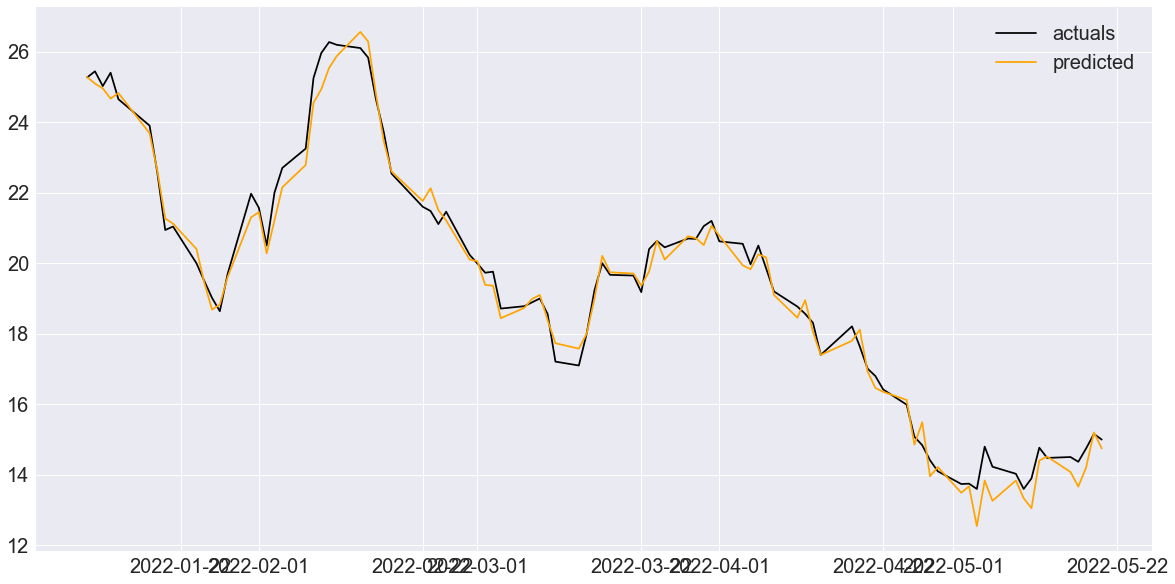

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['tcnnf_next_close'], color='black')
ax.plot(y_test2['tcnnf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TCNNF target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-09-27      9   27  2018        3  50.970001  51.036999  48.900002   
2018-09-28      9   28  2018        3  48.500000  51.209999  48.419998   
2018-10-01     10    1  2018        4  50.119999  51.147999  48.495998   
2018-10-02     10    2  2018        4  48.790001  49.459999  44.900002   
2018-10-03     10    3  2018        4  46.740002  49.285999  45.930000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-09-27  49.419998    14664400       51.980000       48.639999 -2.560002   
2018-09-28  48.639999     9779000       49.419998       48.849998 -0.779999   
2018-10-01  48.849998     9344200       48.639999       45.740002  0.209999   
2018-10-02  45.740002    10450100       48.849998       49.279999 -3.109996   
2018-10-03  49.279999     8034200       45.740002       48.320000  3.539997   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-09-27    -0.049250           51.284000          -0.596001   
2018-09-28    -0.015783           51.056000          -0.228000   
2018-10-01     0.004317           50.325999          -0.730000   
2018-10-02    -0.063664           48.925999          -1.400000   
2018-10-03     0.077394           48.385999          -0.540000   
...                 ...                 ...                ...   
2022-05-17     0.027923            5.578000           0.090000   
2022-05-18    -0.050934            5.700000           0.122000   
2022-05-19     0.050089            5.800000           0.100000   
2022-05-20    -0.059625            5.720000          -0.080000   
2022-05-23    -0.059783            5.612000          -0.108000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-09-27            50.585000               0.535       0.000        0.00   
2018-09-28            50.729999               0.145       0.000        0.00   
2018-10-01            50.754999               0.025       0.000        0.00   
2018-10-02            50.140000              -0.615       0.000        0.00   
2018-10-03            50.133000              -0.007       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17             5.759000              -0.017       3.973        4.10   
2022-05-18             5.651000              -0.108       3.990        4.07   
2022-05-19             5.631000              -0.020       3.990        4.03   
2022-05-20             5.586000              -0.045       3.990        4.20   
2022-05-23             5.550000              -0.036       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

827

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

827
92


In [112]:
X_train3 = train3.drop('tcnnf_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-09-27      9   27  2018        3  50.970001  51.036999  48.900002   
2018-09-28      9   28  2018        3  48.500000  51.209999  48.419998   
2018-10-01     10    1  2018        4  50.119999  51.147999  48.495998   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-09-27  49.419998    14664400       51.980000       48.639999 -2.560002   
2018-09-28  48.639999     9779000       49.419998       48.849998 -0.779999   
2018-10-01  48.849998     9344200       48.639999       45.740002  0.209999   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-09-27    -0.049250           51.284000          -0.596001   
2018-09-28    -0.015783           51.056000          -0.228000   
2018-10-01     0.004317           50.325999          -0.730000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-09-27            50.585000               0.535         0.0         0.0   
2018-09-28            50.729999               0.145         0.0         0.0   
2018-10-01            50.754999               0.025         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-09-27        0.0          0.0           0.0               0.0   
2018-09-28        0.0          0.0           0.0               0.0   
2018-10-01        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-09-27               0.0         0.0            0.0                   0.0   
2018-09-28               0.0         0.0            0.0                   0.0   
2018-10-01               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-09-27                  0.0                    0.0                   0.0   
2018-09-28                  0.0                    0.0                   0.0   
2018-10-01                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-09-27      11.01      11.47    10.850       10.94   12005400.0   
2018-09-28      10.88      11.40    10.860       11.12   10970500.0   
2018-10-01      11.90      11.99    11.045       11.32   13351600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-09-27            11.13            11.12      -0.19     -0.017071   
2018-09-28            10.94            11.32       0.18      0.016453   
2018-10-01            11.12            10.72       0.20      0.017986   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-09-27               11.582              -0.562                11.647   
2018-09-28               11.304              -0.278                11.721   
2018-10-01               11.196              -0.108                11.835   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-09-27                0.083         0.0         0.0        0.0   
2018-09-28                0.074         0.

In [113]:
X_train3.shape

(827, 263)

In [114]:
y_train3 = train3['tcnnf_next_close']
y_train3.head(3)

Date
2018-09-27    11.675
2018-09-28    14.847
2018-10-01    17.270
Name: tcnnf_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2022-01-05    24.150000
2022-01-06    25.290001
2022-01-07    25.320000
Name: tcnnf_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('tcnnf_next_close', axis=1)
y_test3 = test3['tcnnf_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-10      1   10  2022        1      8.73     8.850    8.415       8.75   
2022-01-11      1   11  2022        1      8.70     9.279    8.520       9.11   
2022-01-12      1   12  2022        1      9.16     9.360    8.825       8.92   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-10     7572500            8.52            9.11      0.23     0.026995   
2022-01-11     6190800            8.75            8.92      0.36     0.041143   
2022-01-12     4549300            9.11            8.41     -0.19    -0.020856   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-10               8.564             -0.110                8.757   
2022-01-11               8.592              0.028                8.766   
2022-01-12               8.702              0.110                8.782   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-10              -0.070        6.53       6.690       6.07   
2022-01-11               0.009        6.46       6.880       6.46   
2022-01-12               0.016        6.70       7.364       6.57   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-01-10        6.610      389200.0              6.53             6.640   
2022-01-11        6.640      307300.0              6.61             6.767   
2022-01-12        6.767      565500.0              6.64             6.880   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-01-10       0.080       0.012251                6.4160   
2022-01-11       0.030       0.004539                6.4340   
2022-01-12       0.127       0.019127                6.5734   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-01-10              -0.0280                 6.5270               -0.0270   
2022-01-11               0.0180                 6.5410                0.0140   
2022-01-12               0.1394                 6.5567                0.0157   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-01-10       3.97       4.07     3.840        3.96    3202600.0   
2022-01-11       3.94       4.15     3.880        4.06    2247600.0   
2022-01-12       4.09       4.14     3.945        4.03    1595200.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-01-10             3.90             4.06       0.06      0.015385   
2022-01-11             3.96             4.03       0.10      0.025253   
2022-01-12             4.06             3.90      -0.03     -0.007389   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-01-10                3.928              -0.048                 3.958   
2022-01-11                3.918              -0.010                 3.968   
2022-01-12                3.952               0.034                 3.986   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-01-10               -0.022        8.50        8.72      8.010   
2022-01-11                0.010        8.15        8.65      8

In [118]:
X_test3.shape

(92, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-18    14.75
2022-05-19    15.16
2022-05-20    15.00
Name: tcnnf_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([25.57442698, 25.6901465 , 25.36798931, 25.22518009, 25.35782763])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

0.6584600163912417


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

0.5243613497577914


In [124]:
y_train3 = pd.DataFrame(y_train3, columns=['tcnnf_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['tcnnf_next_close'])

In [125]:
y_test3['tcnnf_pred_next_close'] = y_pred3

In [126]:
y_test3.tail()

tcnnf_next_close  tcnnf_pred_next_close
Date                                               
2022-05-16            14.505              13.815839
2022-05-17            14.370              13.145701
2022-05-18            14.750              13.965487
2022-05-19            15.160              14.309003
2022-05-20            15.000              14.189626

In [127]:
hyper_table.append(dict(stock='tcnnf', 
                        version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        actual_price=y_test3['tcnnf_next_close'][-1],
                        predicted_price=y_test3['tcnnf_pred_next_close'][-1],
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

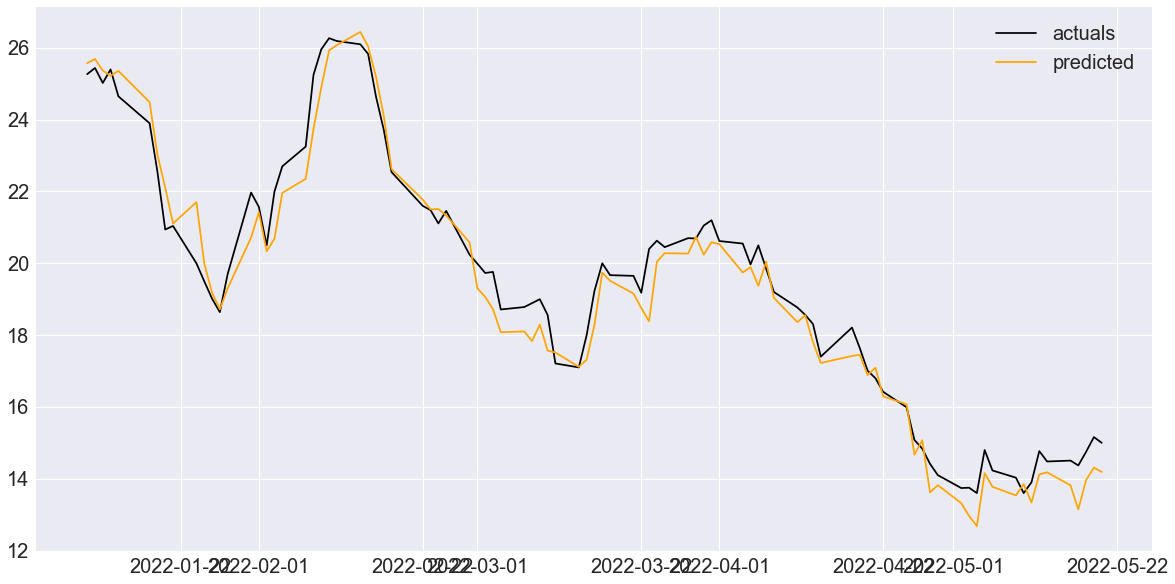

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['tcnnf_next_close'], color='black')
ax.plot(y_test3['tcnnf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TCNNF target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-09-27      9   27  2018        3  50.970001  51.036999  48.900002   
2018-09-28      9   28  2018        3  48.500000  51.209999  48.419998   
2018-10-01     10    1  2018        4  50.119999  51.147999  48.495998   
2018-10-02     10    2  2018        4  48.790001  49.459999  44.900002   
2018-10-03     10    3  2018        4  46.740002  49.285999  45.930000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-09-27  49.419998    14664400       51.980000       48.639999 -2.560002   
2018-09-28  48.639999     9779000       49.419998       48.849998 -0.779999   
2018-10-01  48.849998     9344200       48.639999       45.740002  0.209999   
2018-10-02  45.740002    10450100       48.849998       49.279999 -3.109996   
2018-10-03  49.279999     8034200       45.740002       48.320000  3.539997   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-09-27    -0.049250           51.284000          -0.596001   
2018-09-28    -0.015783           51.056000          -0.228000   
2018-10-01     0.004317           50.325999          -0.730000   
2018-10-02    -0.063664           48.925999          -1.400000   
2018-10-03     0.077394           48.385999          -0.540000   
...                 ...                 ...                ...   
2022-05-17     0.027923            5.578000           0.090000   
2022-05-18    -0.050934            5.700000           0.122000   
2022-05-19     0.050089            5.800000           0.100000   
2022-05-20    -0.059625            5.720000          -0.080000   
2022-05-23    -0.059783            5.612000          -0.108000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-09-27            50.585000               0.535       0.000        0.00   
2018-09-28            50.729999               0.145       0.000        0.00   
2018-10-01            50.754999               0.025       0.000        0.00   
2018-10-02            50.140000              -0.615       0.000        0.00   
2018-10-03            50.133000              -0.007       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17             5.759000              -0.017       3.973        4.10   
2022-05-18             5.651000              -0.108       3.990        4.07   
2022-05-19             5.631000              -0.020       3.990        4.03   
2022-05-20             5.586000              -0.045       3.990        4.20   
2022-05-23             5.550000              -0.036       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

827

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

827
92


In [142]:
X_train4 = train4.drop('tcnnf_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-09-27      9   27  2018        3  50.970001  51.036999  48.900002   
2018-09-28      9   28  2018        3  48.500000  51.209999  48.419998   
2018-10-01     10    1  2018        4  50.119999  51.147999  48.495998   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-09-27  49.419998    14664400       51.980000       48.639999 -2.560002   
2018-09-28  48.639999     9779000       49.419998       48.849998 -0.779999   
2018-10-01  48.849998     9344200       48.639999       45.740002  0.209999   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-09-27    -0.049250           51.284000          -0.596001   
2018-09-28    -0.015783           51.056000          -0.228000   
2018-10-01     0.004317           50.325999          -0.730000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-09-27            50.585000               0.535         0.0         0.0   
2018-09-28            50.729999               0.145         0.0         0.0   
2018-10-01            50.754999               0.025         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-09-27        0.0          0.0           0.0               0.0   
2018-09-28        0.0          0.0           0.0               0.0   
2018-10-01        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-09-27               0.0         0.0            0.0                   0.0   
2018-09-28               0.0         0.0            0.0                   0.0   
2018-10-01               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-09-27                  0.0                    0.0                   0.0   
2018-09-28                  0.0                    0.0                   0.0   
2018-10-01                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-09-27      11.01      11.47    10.850       10.94   12005400.0   
2018-09-28      10.88      11.40    10.860       11.12   10970500.0   
2018-10-01      11.90      11.99    11.045       11.32   13351600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-09-27            11.13            11.12      -0.19     -0.017071   
2018-09-28            10.94            11.32       0.18      0.016453   
2018-10-01            11.12            10.72       0.20      0.017986   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-09-27               11.582              -0.562                11.647   
2018-09-28               11.304              -0.278                11.721   
2018-10-01               11.196              -0.108                11.835   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-09-27                0.083         0.0         0.0        0.0   
2018-09-28                0.074         0.

In [143]:
X_train4.shape

(827, 289)

In [144]:
y_train4 = train4['tcnnf_next_close']
y_train4.head(3)

Date
2018-09-27    11.675
2018-09-28    14.847
2018-10-01    17.270
Name: tcnnf_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2022-01-05    24.150000
2022-01-06    25.290001
2022-01-07    25.320000
Name: tcnnf_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('tcnnf_next_close', axis=1)
y_test4 = test4['tcnnf_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-10      1   10  2022        1      8.73     8.850    8.415       8.75   
2022-01-11      1   11  2022        1      8.70     9.279    8.520       9.11   
2022-01-12      1   12  2022        1      9.16     9.360    8.825       8.92   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-10     7572500            8.52            9.11      0.23     0.026995   
2022-01-11     6190800            8.75            8.92      0.36     0.041143   
2022-01-12     4549300            9.11            8.41     -0.19    -0.020856   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-10               8.564             -0.110                8.757   
2022-01-11               8.592              0.028                8.766   
2022-01-12               8.702              0.110                8.782   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-10              -0.070        6.53       6.690       6.07   
2022-01-11               0.009        6.46       6.880       6.46   
2022-01-12               0.016        6.70       7.364       6.57   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-01-10        6.610      389200.0              6.53             6.640   
2022-01-11        6.640      307300.0              6.61             6.767   
2022-01-12        6.767      565500.0              6.64             6.880   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-01-10       0.080       0.012251                6.4160   
2022-01-11       0.030       0.004539                6.4340   
2022-01-12       0.127       0.019127                6.5734   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-01-10              -0.0280                 6.5270               -0.0270   
2022-01-11               0.0180                 6.5410                0.0140   
2022-01-12               0.1394                 6.5567                0.0157   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-01-10       3.97       4.07     3.840        3.96    3202600.0   
2022-01-11       3.94       4.15     3.880        4.06    2247600.0   
2022-01-12       4.09       4.14     3.945        4.03    1595200.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-01-10             3.90             4.06       0.06      0.015385   
2022-01-11             3.96             4.03       0.10      0.025253   
2022-01-12             4.06             3.90      -0.03     -0.007389   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-01-10                3.928              -0.048                 3.958   
2022-01-11                3.918              -0.010                 3.968   
2022-01-12                3.952               0.034                 3.986   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-01-10               -0.022        8.50        8.72      8.010   
2022-01-11                0.010        8.15        8.65      8

In [148]:
X_test4.shape

(92, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-18    14.75
2022-05-19    15.16
2022-05-20    15.00
Name: tcnnf_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([25.63083098, 25.77438349, 25.43137946, 25.27626222, 25.38098445])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

0.7617906784429868


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

0.6142720932587953


In [154]:
y_train4 = pd.DataFrame(y_train4, columns=['tcnnf_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['tcnnf_next_close'])

In [155]:
y_test4['tcnnf_pred_next_close'] = y_pred4

In [156]:
y_test4.tail()

tcnnf_next_close  tcnnf_pred_next_close
Date                                               
2022-05-16            14.505              13.465501
2022-05-17            14.370              12.643807
2022-05-18            14.750              13.546443
2022-05-19            15.160              13.997123
2022-05-20            15.000              13.786234

In [157]:
hyper_table.append(dict(stock='tcnnf', 
                        version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        actual_price=y_test4['tcnnf_next_close'][-1],
                        predicted_price=y_test4['tcnnf_pred_next_close'][-1],
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

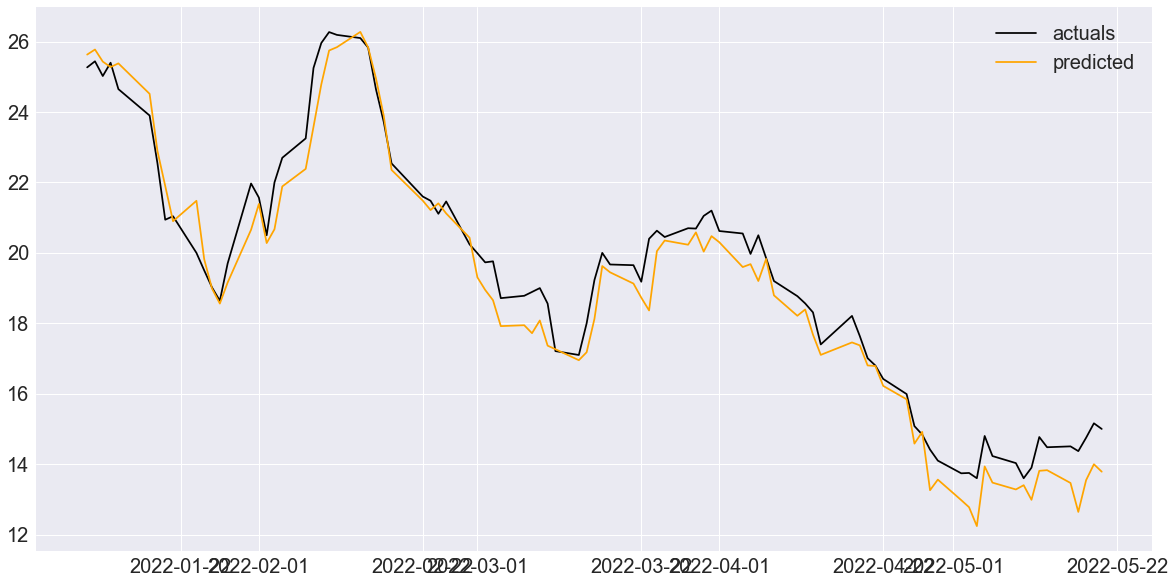

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['tcnnf_next_close'], color='black')
ax.plot(y_test4['tcnnf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TCNNF target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-09-27      9   27  2018        3  50.970001  51.036999  48.900002   
2018-09-28      9   28  2018        3  48.500000  51.209999  48.419998   
2018-10-01     10    1  2018        4  50.119999  51.147999  48.495998   
2018-10-02     10    2  2018        4  48.790001  49.459999  44.900002   
2018-10-03     10    3  2018        4  46.740002  49.285999  45.930000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-09-27  49.419998    14664400       51.980000       48.639999 -2.560002   
2018-09-28  48.639999     9779000       49.419998       48.849998 -0.779999   
2018-10-01  48.849998     9344200       48.639999       45.740002  0.209999   
2018-10-02  45.740002    10450100       48.849998       49.279999 -3.109996   
2018-10-03  49.279999     8034200       45.740002       48.320000  3.539997   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-09-27    -0.049250           51.284000          -0.596001   
2018-09-28    -0.015783           51.056000          -0.228000   
2018-10-01     0.004317           50.325999          -0.730000   
2018-10-02    -0.063664           48.925999          -1.400000   
2018-10-03     0.077394           48.385999          -0.540000   
...                 ...                 ...                ...   
2022-05-17     0.027923            5.578000           0.090000   
2022-05-18    -0.050934            5.700000           0.122000   
2022-05-19     0.050089            5.800000           0.100000   
2022-05-20    -0.059625            5.720000          -0.080000   
2022-05-23    -0.059783            5.612000          -0.108000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-09-27            50.585000               0.535       0.000        0.00   
2018-09-28            50.729999               0.145       0.000        0.00   
2018-10-01            50.754999               0.025       0.000        0.00   
2018-10-02            50.140000              -0.615       0.000        0.00   
2018-10-03            50.133000              -0.007       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17             5.759000              -0.017       3.973        4.10   
2022-05-18             5.651000              -0.108       3.990        4.07   
2022-05-19             5.631000              -0.020       3.990        4.03   
2022-05-20             5.586000              -0.045       3.990        4.20   
2022-05-23             5.550000              -0.036       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

827

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

827
92


In [172]:
X_train5 = train5.drop('tcnnf_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-09-27      9   27  2018        3  50.970001  51.036999  48.900002   
2018-09-28      9   28  2018        3  48.500000  51.209999  48.419998   
2018-10-01     10    1  2018        4  50.119999  51.147999  48.495998   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-09-27  49.419998    14664400       51.980000       48.639999 -2.560002   
2018-09-28  48.639999     9779000       49.419998       48.849998 -0.779999   
2018-10-01  48.849998     9344200       48.639999       45.740002  0.209999   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-09-27    -0.049250           51.284000          -0.596001   
2018-09-28    -0.015783           51.056000          -0.228000   
2018-10-01     0.004317           50.325999          -0.730000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-09-27            50.585000               0.535         0.0         0.0   
2018-09-28            50.729999               0.145         0.0         0.0   
2018-10-01            50.754999               0.025         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-09-27        0.0          0.0           0.0               0.0   
2018-09-28        0.0          0.0           0.0               0.0   
2018-10-01        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-09-27               0.0         0.0            0.0                   0.0   
2018-09-28               0.0         0.0            0.0                   0.0   
2018-10-01               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-09-27                  0.0                    0.0                   0.0   
2018-09-28                  0.0                    0.0                   0.0   
2018-10-01                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-09-27      11.01      11.47    10.850       10.94   12005400.0   
2018-09-28      10.88      11.40    10.860       11.12   10970500.0   
2018-10-01      11.90      11.99    11.045       11.32   13351600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-09-27            11.13            11.12      -0.19     -0.017071   
2018-09-28            10.94            11.32       0.18      0.016453   
2018-10-01            11.12            10.72       0.20      0.017986   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-09-27               11.582              -0.562                11.647   
2018-09-28               11.304              -0.278                11.721   
2018-10-01               11.196              -0.108                11.835   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-09-27                0.083         0.0         0.0        0.0   
2018-09-28                0.074         0.

In [173]:
X_train5.shape

(827, 393)

In [174]:
y_train5 = train5['tcnnf_next_close']
y_train5.head(3)

Date
2018-09-27    11.675
2018-09-28    14.847
2018-10-01    17.270
Name: tcnnf_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2022-01-05    24.150000
2022-01-06    25.290001
2022-01-07    25.320000
Name: tcnnf_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('tcnnf_next_close', axis=1)
y_test5 = test5['tcnnf_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-10      1   10  2022        1      8.73     8.850    8.415       8.75   
2022-01-11      1   11  2022        1      8.70     9.279    8.520       9.11   
2022-01-12      1   12  2022        1      9.16     9.360    8.825       8.92   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-10     7572500            8.52            9.11      0.23     0.026995   
2022-01-11     6190800            8.75            8.92      0.36     0.041143   
2022-01-12     4549300            9.11            8.41     -0.19    -0.020856   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-10               8.564             -0.110                8.757   
2022-01-11               8.592              0.028                8.766   
2022-01-12               8.702              0.110                8.782   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-10              -0.070        6.53       6.690       6.07   
2022-01-11               0.009        6.46       6.880       6.46   
2022-01-12               0.016        6.70       7.364       6.57   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-01-10        6.610      389200.0              6.53             6.640   
2022-01-11        6.640      307300.0              6.61             6.767   
2022-01-12        6.767      565500.0              6.64             6.880   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-01-10       0.080       0.012251                6.4160   
2022-01-11       0.030       0.004539                6.4340   
2022-01-12       0.127       0.019127                6.5734   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-01-10              -0.0280                 6.5270               -0.0270   
2022-01-11               0.0180                 6.5410                0.0140   
2022-01-12               0.1394                 6.5567                0.0157   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-01-10       3.97       4.07     3.840        3.96    3202600.0   
2022-01-11       3.94       4.15     3.880        4.06    2247600.0   
2022-01-12       4.09       4.14     3.945        4.03    1595200.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-01-10             3.90             4.06       0.06      0.015385   
2022-01-11             3.96             4.03       0.10      0.025253   
2022-01-12             4.06             3.90      -0.03     -0.007389   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-01-10                3.928              -0.048                 3.958   
2022-01-11                3.918              -0.010                 3.968   
2022-01-12                3.952               0.034                 3.986   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-01-10               -0.022        8.50        8.72      8.010   
2022-01-11                0.010        8.15        8.65      8

In [178]:
X_test5.shape

(92, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-18    14.75
2022-05-19    15.16
2022-05-20    15.00
Name: tcnnf_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([25.34230764, 25.36046758, 24.97605174, 24.96091681, 25.19880123])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

0.7456754443702029


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

0.6315806983220457


In [184]:
y_train5 = pd.DataFrame(y_train5, columns=['tcnnf_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['tcnnf_next_close'])

In [185]:
y_test5['tcnnf_pred_next_close'] = y_pred5

In [186]:
y_test5.tail()

tcnnf_next_close  tcnnf_pred_next_close
Date                                               
2022-05-16            14.505              13.895596
2022-05-17            14.370              12.953331
2022-05-18            14.750              13.566450
2022-05-19            15.160              14.304273
2022-05-20            15.000              13.942399

In [187]:
hyper_table.append(dict(stock='tcnnf', 
                        version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        actual_price=y_test5['tcnnf_next_close'][-1],
                        predicted_price=y_test5['tcnnf_pred_next_close'][-1],
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

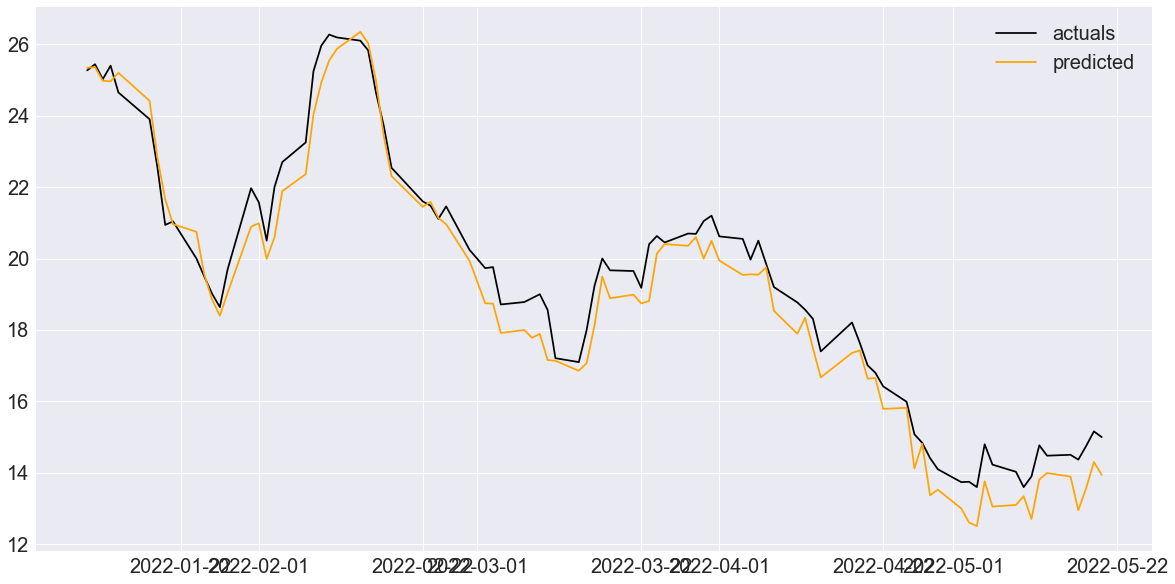

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['tcnnf_next_close'], color='black')
ax.plot(y_test5['tcnnf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (TCNNF target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-09-27      9   27  2018        3  50.970001  51.036999  48.900002   
2018-09-28      9   28  2018        3  48.500000  51.209999  48.419998   
2018-10-01     10    1  2018        4  50.119999  51.147999  48.495998   
2018-10-02     10    2  2018        4  48.790001  49.459999  44.900002   
2018-10-03     10    3  2018        4  46.740002  49.285999  45.930000   
...           ...  ...   ...      ...        ...        ...        ...   
2022-05-17      5   17  2022        2   5.870000   6.110000   5.729000   
2022-05-18      5   18  2022        2   5.800000   5.955000   5.560000   
2022-05-19      5   19  2022        2   5.510000   6.000000   5.500000   
2022-05-20      5   20  2022        2   5.910000   5.950000   5.360000   
2022-05-23      5   23  2022        2   5.520000   5.590000   5.120000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-09-27  49.419998    14664400       51.980000       48.639999 -2.560002   
2018-09-28  48.639999     9779000       49.419998       48.849998 -0.779999   
2018-10-01  48.849998     9344200       48.639999       45.740002  0.209999   
2018-10-02  45.740002    10450100       48.849998       49.279999 -3.109996   
2018-10-03  49.279999     8034200       45.740002       48.320000  3.539997   
...               ...         ...             ...             ...       ...   
2022-05-17   5.890000     3131000        5.730000        5.590000  0.160000   
2022-05-18   5.590000     3909700        5.890000        5.870000 -0.300000   
2022-05-19   5.870000     4272300        5.590000        5.520000  0.280000   
2022-05-20   5.520000     6379000        5.870000        5.190000 -0.350000   
2022-05-23   5.190000     5931600        5.520000        0.000000 -0.330000   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-09-27    -0.049250           51.284000          -0.596001   
2018-09-28    -0.015783           51.056000          -0.228000   
2018-10-01     0.004317           50.325999          -0.730000   
2018-10-02    -0.063664           48.925999          -1.400000   
2018-10-03     0.077394           48.385999          -0.540000   
...                 ...                 ...                ...   
2022-05-17     0.027923            5.578000           0.090000   
2022-05-18    -0.050934            5.700000           0.122000   
2022-05-19     0.050089            5.800000           0.100000   
2022-05-20    -0.059625            5.720000          -0.080000   
2022-05-23    -0.059783            5.612000          -0.108000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-09-27            50.585000               0.535       0.000        0.00   
2018-09-28            50.729999               0.145       0.000        0.00   
2018-10-01            50.754999               0.025       0.000        0.00   
2018-10-02            50.140000              -0.615       0.000        0.00   
2018-10-03            50.133000              -0.007       0.000        0.00   
...                         ...                 ...         ...         ...   
2022-05-17             5.759000              -0.017       3.973        4.10   
2022-05-18             5.651000              -0.108       3.990        4.07   
2022-05-19             5.631000              -0.020       3.990        4.03   
2022-05-20             5.586000              -0.045       3.990        4.20   
2022-05-23             5.550000              -0.036       4.210        4.22   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                            

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

827

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

827
92


In [202]:
X_train6 = train6.drop('tcnnf_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2018-09-27      9   27  2018        3  50.970001  51.036999  48.900002   
2018-09-28      9   28  2018        3  48.500000  51.209999  48.419998   
2018-10-01     10    1  2018        4  50.119999  51.147999  48.495998   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  \
Date                                                                          
2018-09-27  49.419998    14664400       51.980000       48.639999 -2.560002   
2018-09-28  48.639999     9779000       49.419998       48.849998 -0.779999   
2018-10-01  48.849998     9344200       48.639999       45.740002  0.209999   

            cgc_%change  cgc_5day_avg_close  cgc_5day_avg_diff  \
Date                                                             
2018-09-27    -0.049250           51.284000          -0.596001   
2018-09-28    -0.015783           51.056000          -0.228000   
2018-10-01     0.004317           50.325999          -0.730000   

            cgc_10day_avg_close  cgc_10day_avg_diff  crlbf_Open  crlbf_High  \
Date                                                                          
2018-09-27            50.585000               0.535         0.0         0.0   
2018-09-28            50.729999               0.145         0.0         0.0   
2018-10-01            50.754999               0.025         0.0         0.0   

            crlbf_Low  crlbf_Close  crlbf_Volume  crlbf_prev_close  \
Date                                                                 
2018-09-27        0.0          0.0           0.0               0.0   
2018-09-28        0.0          0.0           0.0               0.0   
2018-10-01        0.0          0.0           0.0               0.0   

            crlbf_next_close  crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                                            
2018-09-27               0.0         0.0            0.0                   0.0   
2018-09-28               0.0         0.0            0.0                   0.0   
2018-10-01               0.0         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2018-09-27                  0.0                    0.0                   0.0   
2018-09-28                  0.0                    0.0                   0.0   
2018-10-01                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2018-09-27      11.01      11.47    10.850       10.94   12005400.0   
2018-09-28      10.88      11.40    10.860       11.12   10970500.0   
2018-10-01      11.90      11.99    11.045       11.32   13351600.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2018-09-27            11.13            11.12      -0.19     -0.017071   
2018-09-28            10.94            11.32       0.18      0.016453   
2018-10-01            11.12            10.72       0.20      0.017986   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2018-09-27               11.582              -0.562                11.647   
2018-09-28               11.304              -0.278                11.721   
2018-10-01               11.196              -0.108                11.835   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2018-09-27                0.083         0.0         0.0        0.0   
2018-09-28                0.074         0.

In [203]:
X_train6.shape

(827, 419)

In [204]:
y_train6 = train6['tcnnf_next_close']
y_train6.head(3)

Date
2018-09-27    11.675
2018-09-28    14.847
2018-10-01    17.270
Name: tcnnf_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2022-01-05    24.150000
2022-01-06    25.290001
2022-01-07    25.320000
Name: tcnnf_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('tcnnf_next_close', axis=1)
y_test6 = test6['tcnnf_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2022-01-10      1   10  2022        1      8.73     8.850    8.415       8.75   
2022-01-11      1   11  2022        1      8.70     9.279    8.520       9.11   
2022-01-12      1   12  2022        1      9.16     9.360    8.825       8.92   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2022-01-10     7572500            8.52            9.11      0.23     0.026995   
2022-01-11     6190800            8.75            8.92      0.36     0.041143   
2022-01-12     4549300            9.11            8.41     -0.19    -0.020856   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2022-01-10               8.564             -0.110                8.757   
2022-01-11               8.592              0.028                8.766   
2022-01-12               8.702              0.110                8.782   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2022-01-10              -0.070        6.53       6.690       6.07   
2022-01-11               0.009        6.46       6.880       6.46   
2022-01-12               0.016        6.70       7.364       6.57   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2022-01-10        6.610      389200.0              6.53             6.640   
2022-01-11        6.640      307300.0              6.61             6.767   
2022-01-12        6.767      565500.0              6.64             6.880   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2022-01-10       0.080       0.012251                6.4160   
2022-01-11       0.030       0.004539                6.4340   
2022-01-12       0.127       0.019127                6.5734   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2022-01-10              -0.0280                 6.5270               -0.0270   
2022-01-11               0.0180                 6.5410                0.0140   
2022-01-12               0.1394                 6.5567                0.0157   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2022-01-10       3.97       4.07     3.840        3.96    3202600.0   
2022-01-11       3.94       4.15     3.880        4.06    2247600.0   
2022-01-12       4.09       4.14     3.945        4.03    1595200.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2022-01-10             3.90             4.06       0.06      0.015385   
2022-01-11             3.96             4.03       0.10      0.025253   
2022-01-12             4.06             3.90      -0.03     -0.007389   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2022-01-10                3.928              -0.048                 3.958   
2022-01-11                3.918              -0.010                 3.968   
2022-01-12                3.952               0.034                 3.986   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2022-01-10               -0.022        8.50        8.72      8.010   
2022-01-11                0.010        8.15        8.65      8

In [208]:
X_test6.shape

(92, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-18    14.75
2022-05-19    15.16
2022-05-20    15.00
Name: tcnnf_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([25.51474841, 25.56179788, 25.16292765, 25.06195549, 25.3087378 ])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

0.7520065160620248


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

0.636391186912999


In [214]:
y_train6 = pd.DataFrame(y_train6, columns=['tcnnf_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['tcnnf_next_close'])

In [215]:
y_test6['tcnnf_pred_next_close'] = y_pred6

In [216]:
y_test6.tail()

tcnnf_next_close  tcnnf_pred_next_close
Date                                               
2022-05-16            14.505              13.867024
2022-05-17            14.370              12.801626
2022-05-18            14.750              13.399690
2022-05-19            15.160              14.251162
2022-05-20            15.000              13.892656

In [217]:
hyper_table.append(dict(stock='tcnnf', 
                        version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        actual_price=y_test6['tcnnf_next_close'][-1],
                        predicted_price=y_test6['tcnnf_pred_next_close'][-1],
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

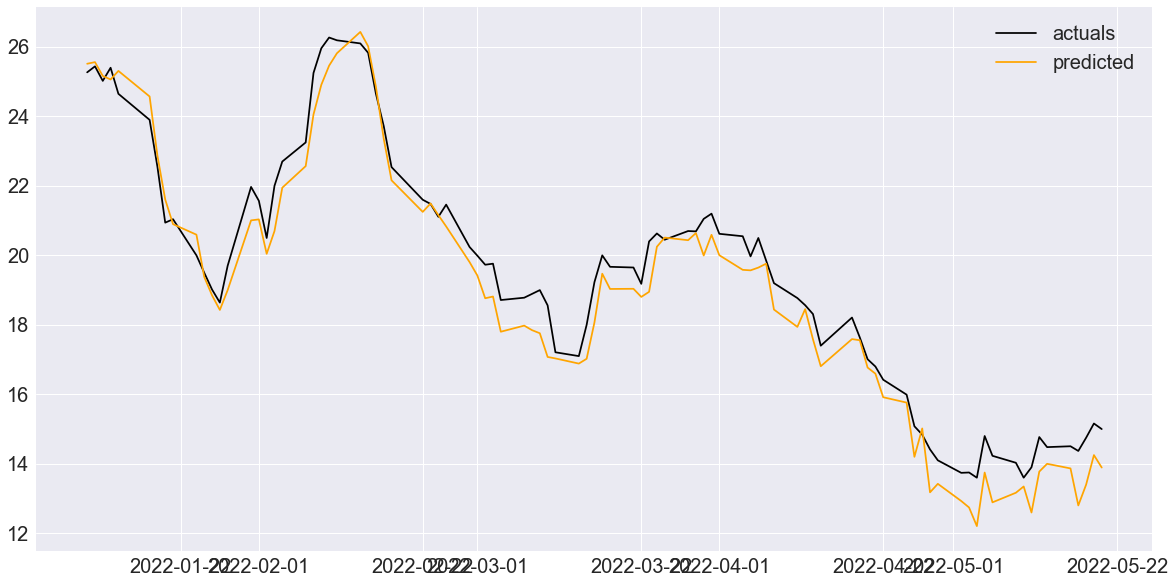

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['tcnnf_next_close'], color='black')
ax.plot(y_test6['tcnnf_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

stock       version               model      rmse       mae  actual_price  \
1  tcnnf        1+ETFs  LinearRegression()  0.386340  0.305602          15.0   
2  tcnnf    1+ETFs+Dow  LinearRegression()  0.407269  0.316638          15.0   
0  tcnnf         1+Dow  LinearRegression()  0.655603  0.529045          15.0   
3  tcnnf    All stocks  LinearRegression()  0.658460  0.524361          15.0   
5  tcnnf      All+ETFs  LinearRegression()  0.745675  0.631581          15.0   
6  tcnnf  All+ETFs+Dow  LinearRegression()  0.752007  0.636391          15.0   
4  tcnnf       All+Dow  LinearRegression()  0.761791  0.614272          15.0   

   predicted_price  rows  train_rows  test_rows  columns  
1        14.620530   919         827         92      160  
2        14.748659   919         827         92      186  
0        15.577283   919         827         92       56  
3        14.189626   919         827         92      264  
5        13.942399   919         827         92      394  
6        13.892656   919         827         92      420  
4        13.786234   919         827         92      290

In [220]:
hyper_table_tcnnf = hyper_table.head(1)
hyper_table_tcnnf

stock version               model     rmse       mae  actual_price  \
1  tcnnf  1+ETFs  LinearRegression()  0.38634  0.305602          15.0   

   predicted_price  rows  train_rows  test_rows  columns  
1         14.62053   919         827         92      160

In [221]:
hyper_table_tcnnf.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table_tcnnf.csv', index=True)

## Simulation - Sell

In [222]:
tcnnf_sim = df1[n:]
tcnnf_sim = tcnnf_sim[['tcnnf_Open', 'tcnnf_Close']]
tcnnf_sim.head()

tcnnf_Open  tcnnf_Close
Date                               
2022-01-10      25.500    25.320000
2022-01-11      25.500    25.268000
2022-01-12      25.421    25.440001
2022-01-13      25.510    25.021999
2022-01-14      26.260    25.400000

In [223]:
tcnnf_sim.shape

(92, 2)

In [224]:
tcnnf_sim.tail()

tcnnf_Open  tcnnf_Close
Date                               
2022-05-16       14.77       14.480
2022-05-17       14.48       14.505
2022-05-18       14.91       14.370
2022-05-19       14.36       14.750
2022-05-20       15.03       15.160

In [225]:
tcnnf_sim['tcnnf_Pred_Close'] = y_pred1
tcnnf_sim.head()

tcnnf_Open  tcnnf_Close  tcnnf_Pred_Close
Date                                                 
2022-01-10      25.500    25.320000         25.332956
2022-01-11      25.500    25.268000         25.071321
2022-01-12      25.421    25.440001         24.981770
2022-01-13      25.510    25.021999         24.789433
2022-01-14      26.260    25.400000         24.970448

In [226]:
tcnnf_sim['Trade'] = tcnnf_sim['tcnnf_Pred_Close'] > tcnnf_sim['tcnnf_Open']
tcnnf_sim.head()

tcnnf_Open  tcnnf_Close  tcnnf_Pred_Close  Trade
Date                                                        
2022-01-10      25.500    25.320000         25.332956  False
2022-01-11      25.500    25.268000         25.071321  False
2022-01-12      25.421    25.440001         24.981770  False
2022-01-13      25.510    25.021999         24.789433  False
2022-01-14      26.260    25.400000         24.970448  False

In [227]:
tcnnf_sim = tcnnf_sim[tcnnf_sim['Trade']==True]
tcnnf_sim.head()

tcnnf_Open  tcnnf_Close  tcnnf_Pred_Close  Trade
Date                                                        
2022-01-24   20.200001    21.040001         20.607467   True
2022-01-28   18.879999    18.639999         19.575044   True
2022-01-31   18.700001    19.700001         21.304066   True
2022-02-01   20.420000    21.969999         21.469664   True
2022-02-03   21.105000    20.500000         21.223876   True

In [228]:
tcnnf_sim['Gains'] = (tcnnf_sim['tcnnf_Close'] - tcnnf_sim['tcnnf_Open'])*100
tcnnf_sim.head()

tcnnf_Open  tcnnf_Close  tcnnf_Pred_Close  Trade     Gains
Date                                                                  
2022-01-24   20.200001    21.040001         20.607467   True   84.0000
2022-01-28   18.879999    18.639999         19.575044   True  -24.0000
2022-01-31   18.700001    19.700001         21.304066   True  100.0000
2022-02-01   20.420000    21.969999         21.469664   True  154.9999
2022-02-03   21.105000    20.500000         21.223876   True  -60.5000

In [229]:
total_gains = tcnnf_sim['Gains'].sum()
print(round(total_gains, 2))

1700.6
